In [1]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
!apt-get update -qq
!apt-get install fonte-nanum* -qq

import matplotlib.font_manager as fm
fm._rebuild()

# 한글 폰트 확인하기
for fontInfo in fm.fontManager.ttflist:
  if 'Nanum' in fontInfo.name:
    print(fontInfo.name + ' = '+fontInfo.fname)

plt.rc('font', family = 'NanumGothic')

E: Unable to locate package fonte-nanum*
E: Couldn't find any package by glob 'fonte-nanum*'
E: Couldn't find any package by regex 'fonte-nanum*'
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothic.ttf


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'NanumGothic' 

data = pd.read_csv('/content/drive/MyDrive/sd솔데스크/팀 프로젝트/Proj_WT/DataSets/한국관광공사_관광빅데이터/서울자치구_방문자수집계_0426_0618.csv')
data.head()

data = data.rename(columns = {'baseYmd':'date_time', 'daywkDivCd':'dayofyear','daywkDivNm':'weekday','signguCode':'구별코드','signguNm':'구'})

In [3]:
# 우리가 원하는 데이터인 현지인과 외지인이 어디로 갔는지 분석해 보자.
train_현지인 = data[data['touDivNm'] == '현지인(a)']
train_외지인 = data[data['touDivNm'] == '외지인(b)']

# touDivCd 라는 변수는 현지인과 외지인을 나타내기 때문에 제외시켜 준다.
train_현지인.drop('touDivNm', axis = 1, inplace = True)
train_외지인.drop('touDivNm', axis = 1, inplace = True)

# 현지인과 외지인을 합쳐서 dataframe을 다시 구축해준다.
touNum = train_현지인['touNum'].values + train_외지인['touNum'].values
train_현지인['touNum'] = touNum
train = train_현지인.copy()

train = train.reset_index(drop= True)

train = train.rename(columns = {'touNum':'target'})

In [4]:
train.head()

,date_time,dayofyear,weekday,구별코드,구,touDivCd,target
0,20210426,1,월요일,11110,종로구,1,436726.5
1,20210427,2,화요일,11110,종로구,1,448294.0
2,20210428,3,수요일,11110,종로구,1,462843.5
3,20210429,4,목요일,11110,종로구,1,460985.0
4,20210430,5,금요일,11110,종로구,1,472216.5


In [5]:
train['date_time'] = train['date_time'].astype('str')

# 시간을 년, 월, 일로 나눠준다.
def date_time(df, columns = 'date_time'):
  df['year'] = df[columns].apply(lambda x:x[:4])
  df['month'] = df[columns].apply(lambda x: x[4:6])
  df['day'] = df[columns].apply(lambda x:x[6:8])
  return df

def weekday(df, columns = 'date_time'):
    df[columns]=pd.to_datetime(df[columns])
    df['weekday'] = df[columns].apply(lambda x:x.weekday())
    df['weekend'] = df['weekday']
    df['weekday'] = df['weekday'].apply(lambda x:1 if x > 4 else 0)
    df['date'] = df[columns].dt.date
    return df

train = date_time(train)
train = weekday(train)
train.head()

,date_time,dayofyear,weekday,구별코드,구,touDivCd,target,year,month,day,weekend,date
0,2021-04-26,1,0,11110,종로구,1,436726.5,2021,04,26,0,2021-04-26
1,2021-04-27,2,0,11110,종로구,1,448294.0,2021,04,27,1,2021-04-27
2,2021-04-28,3,0,11110,종로구,1,462843.5,2021,04,28,2,2021-04-28
3,2021-04-29,4,0,11110,종로구,1,460985.0,2021,04,29,3,2021-04-29
4,2021-04-30,5,0,11110,종로구,1,472216.5,2021,04,30,4,2021-04-30


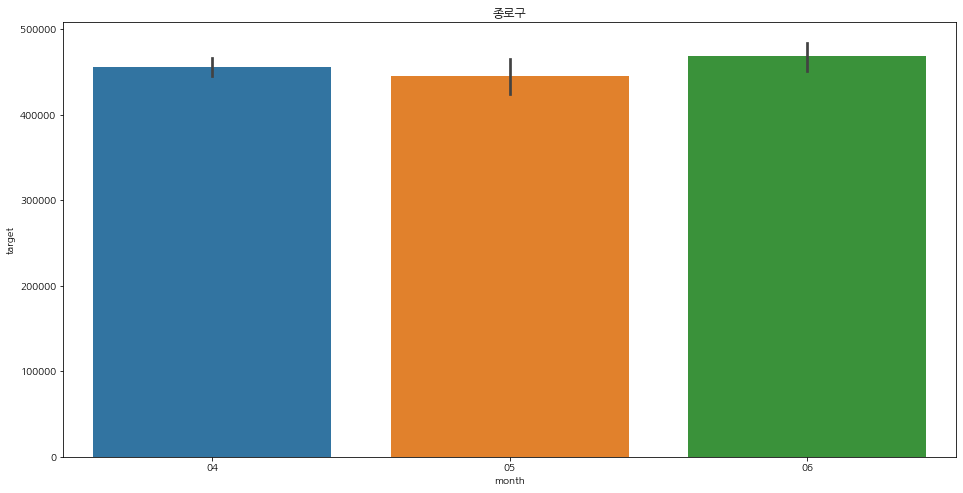

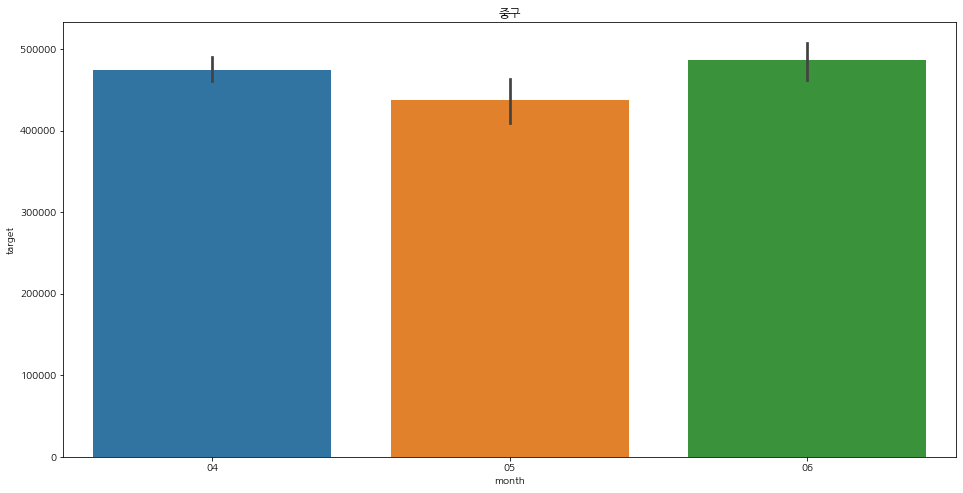

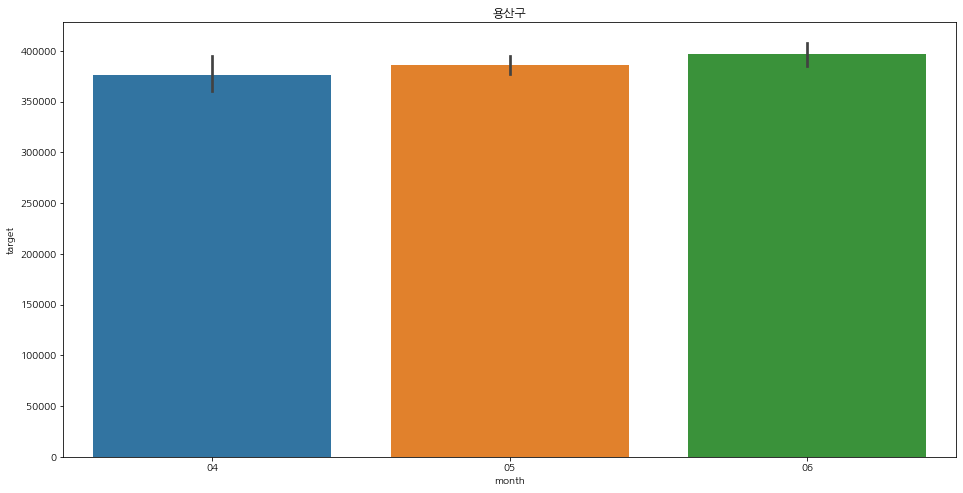

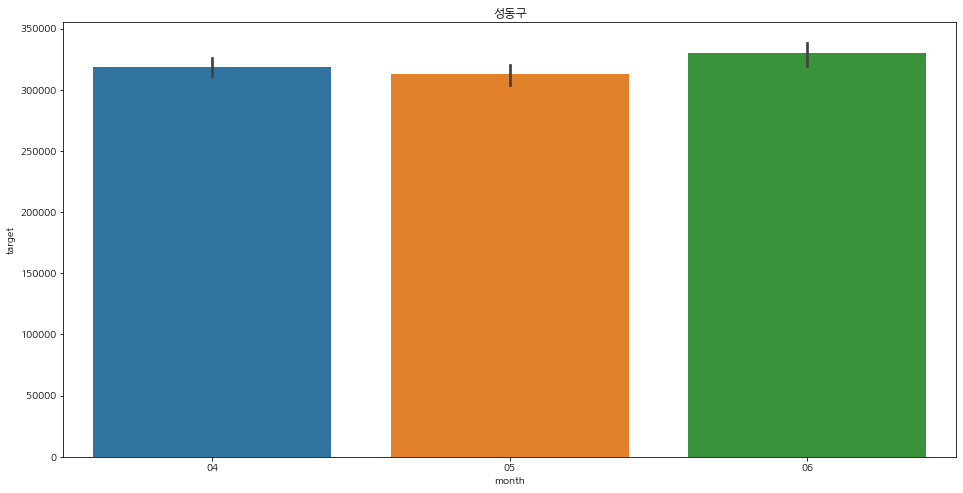

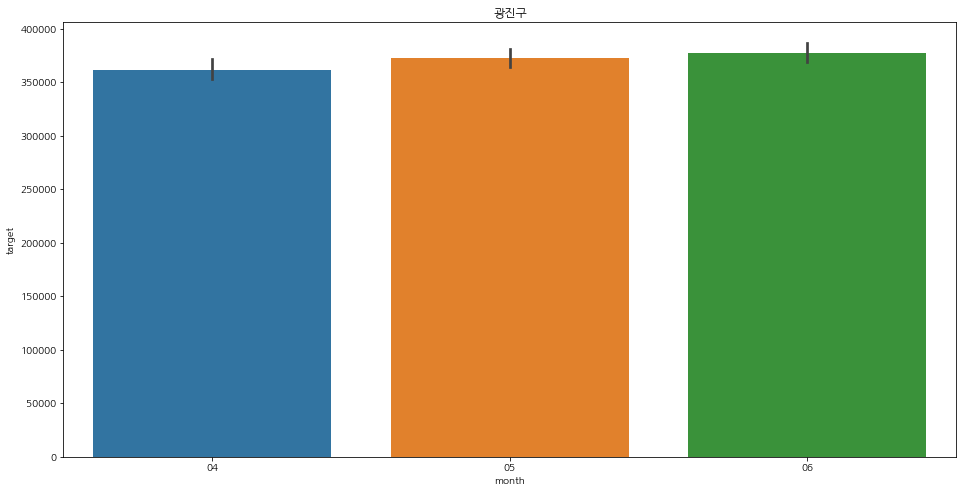

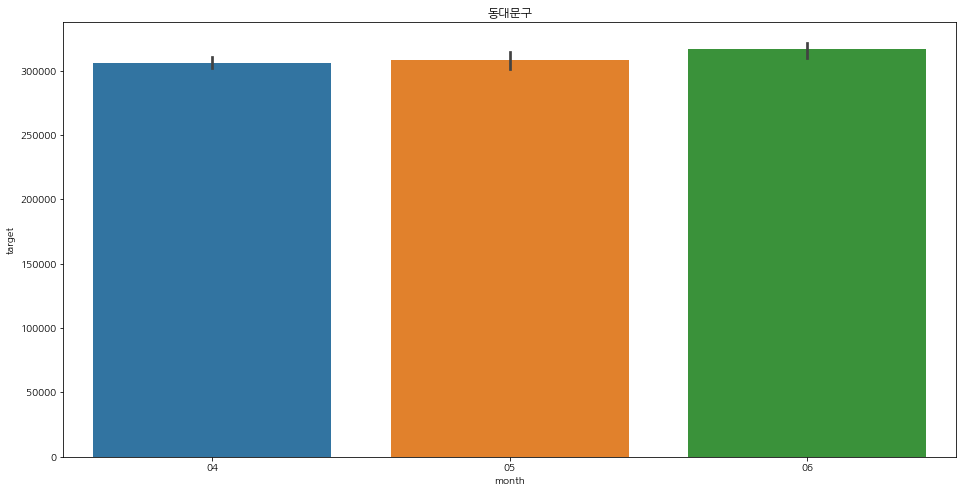

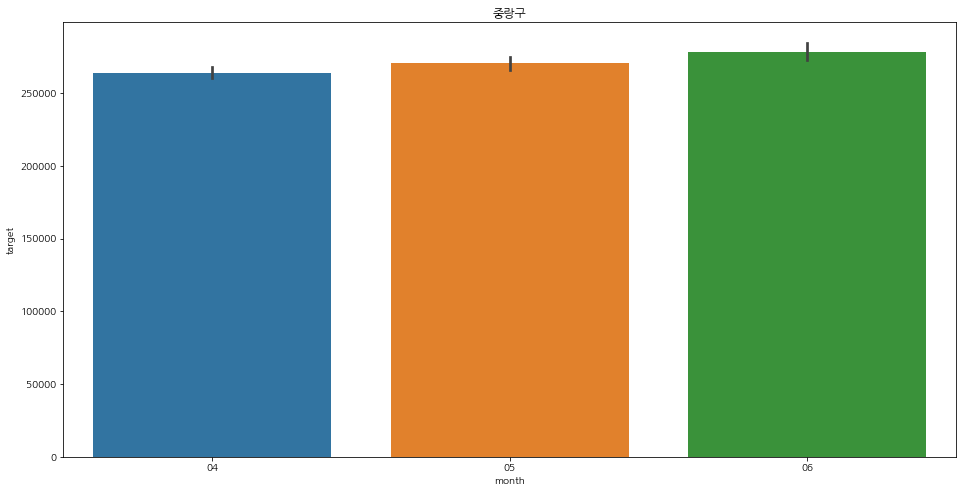

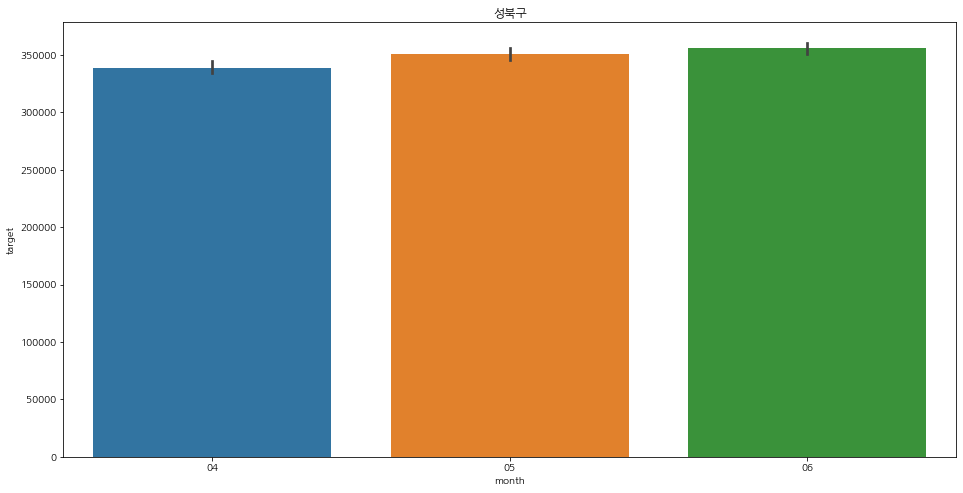

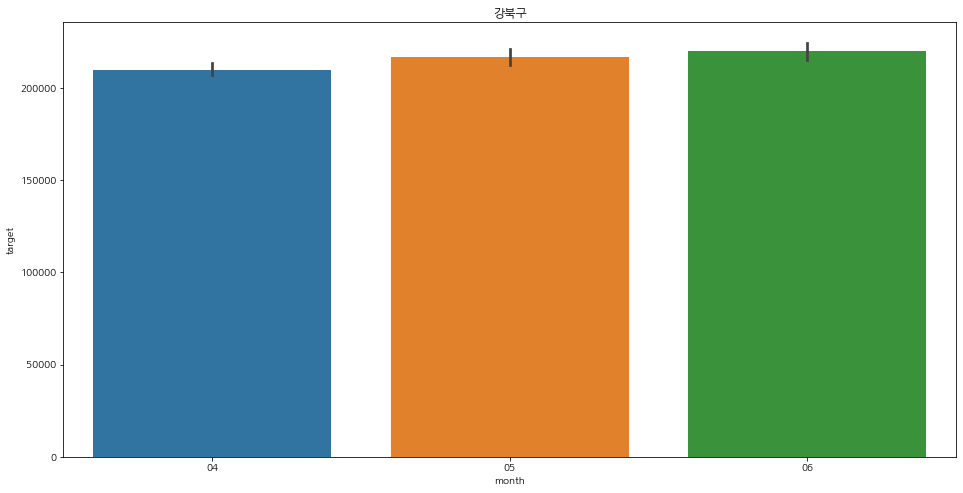

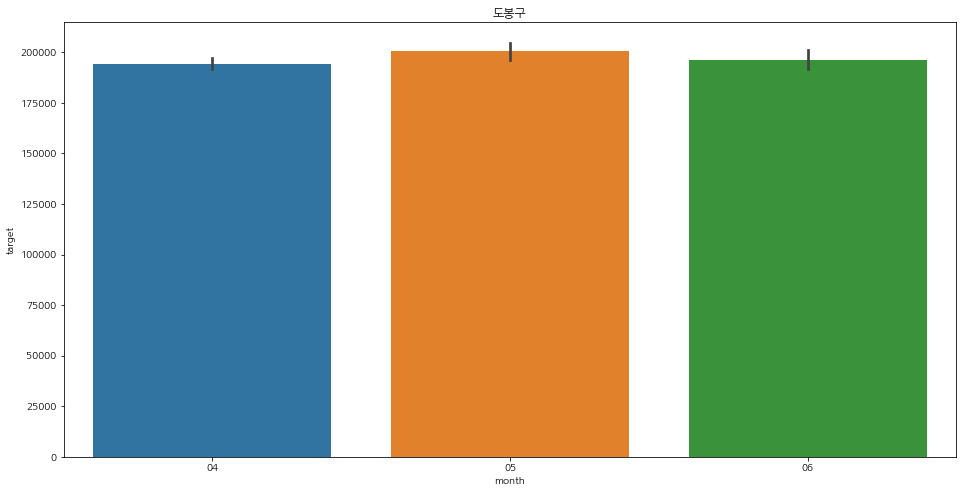

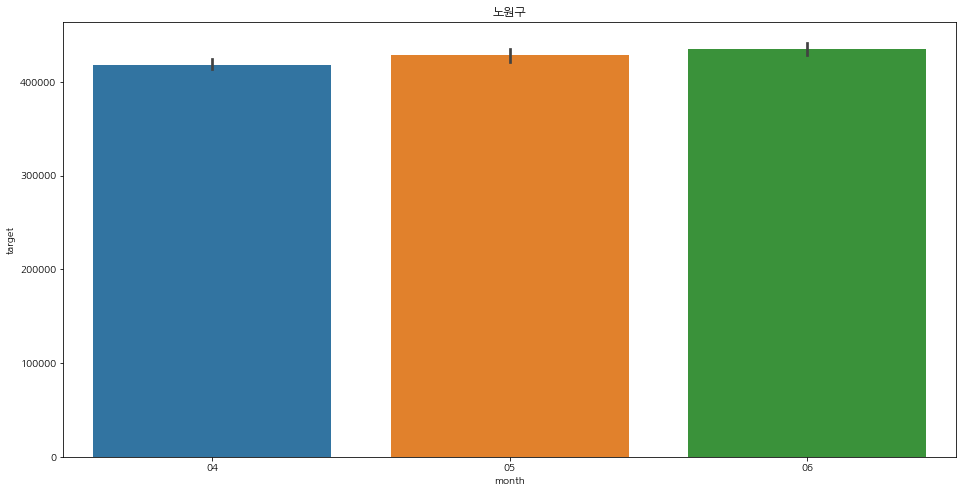

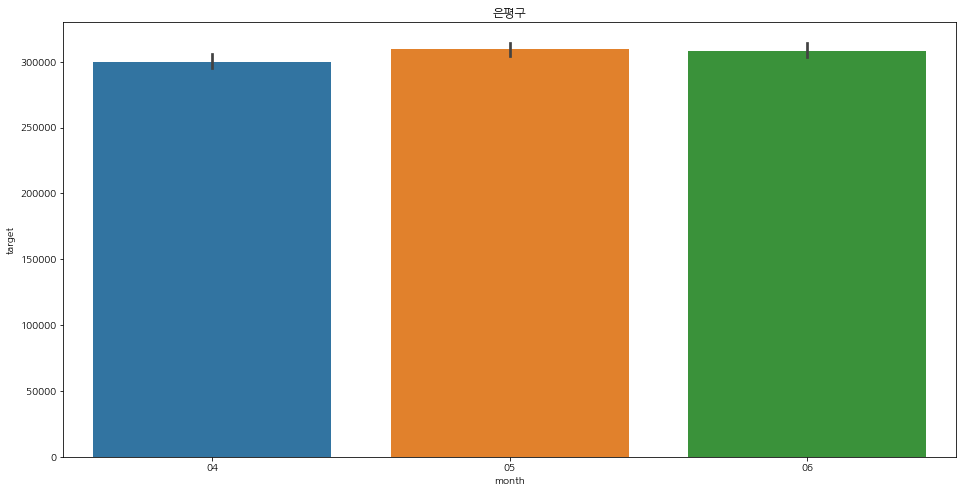

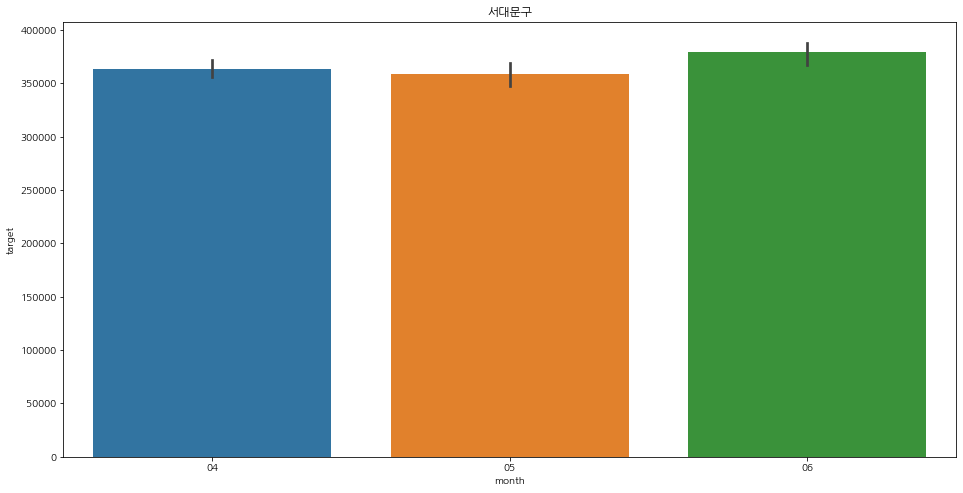

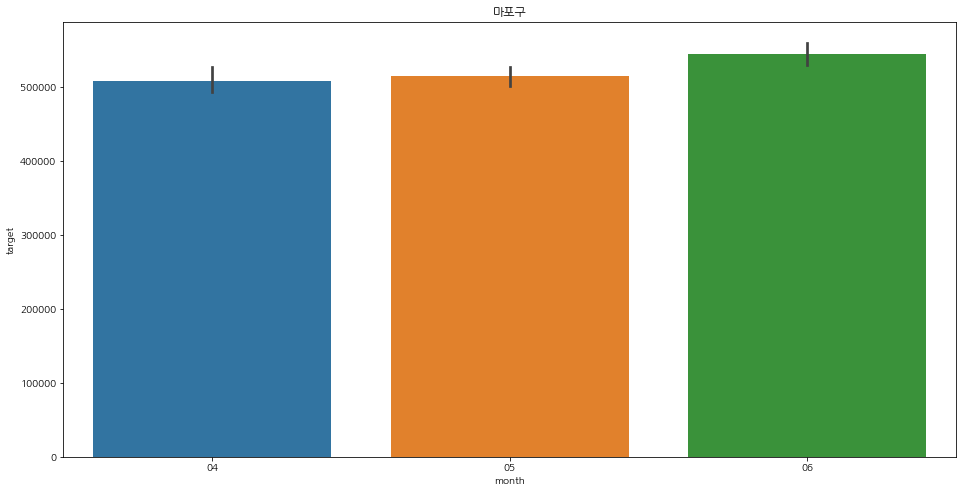

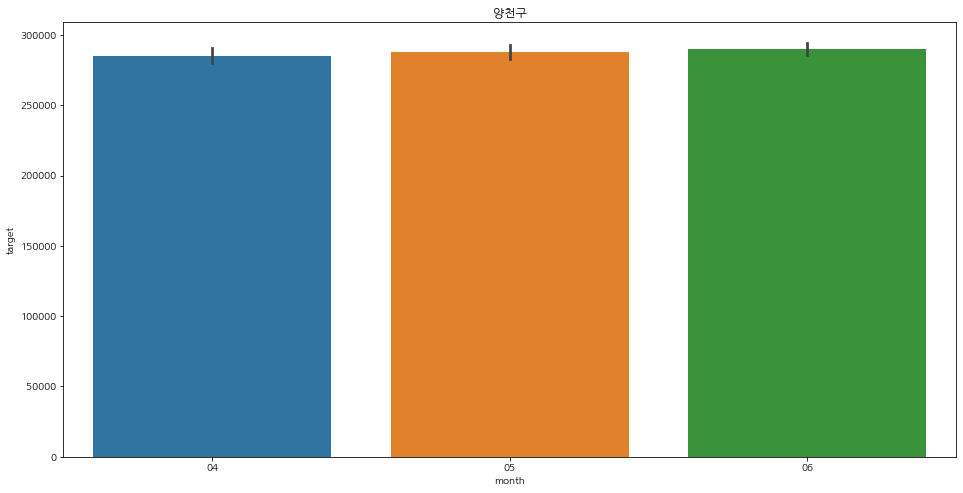

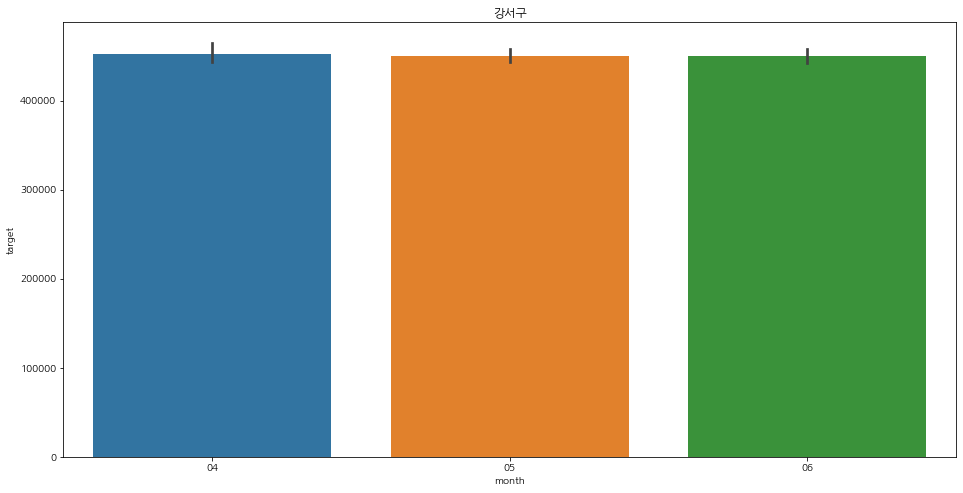

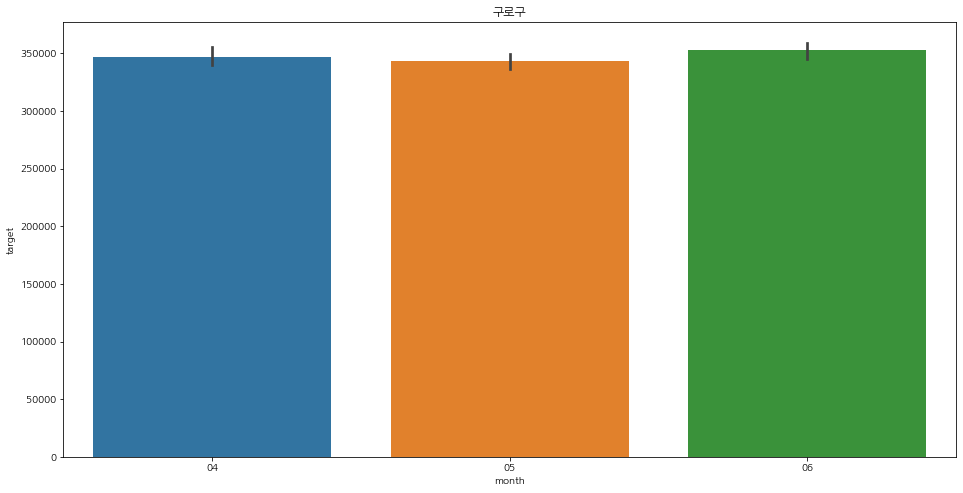

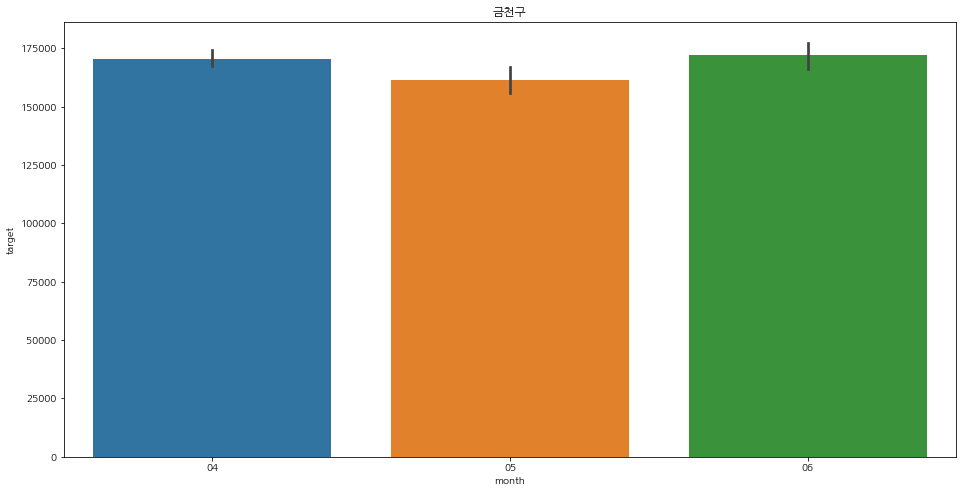

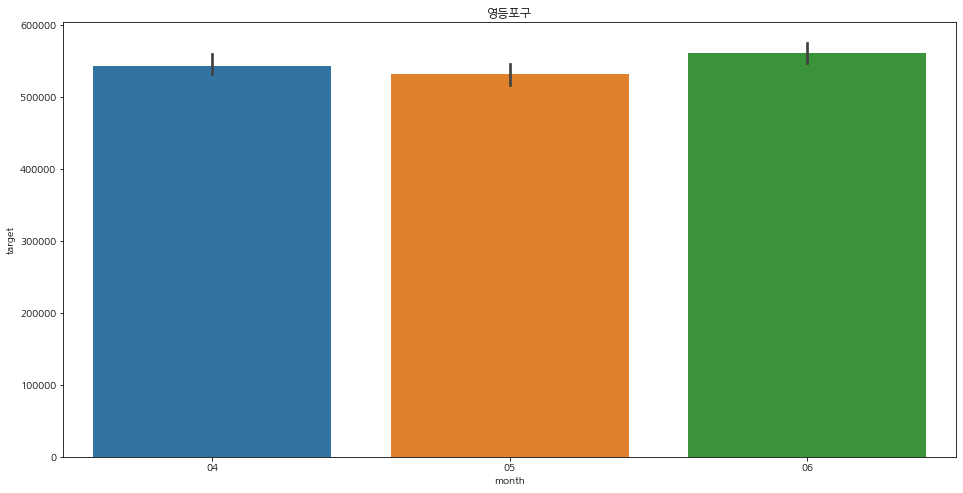

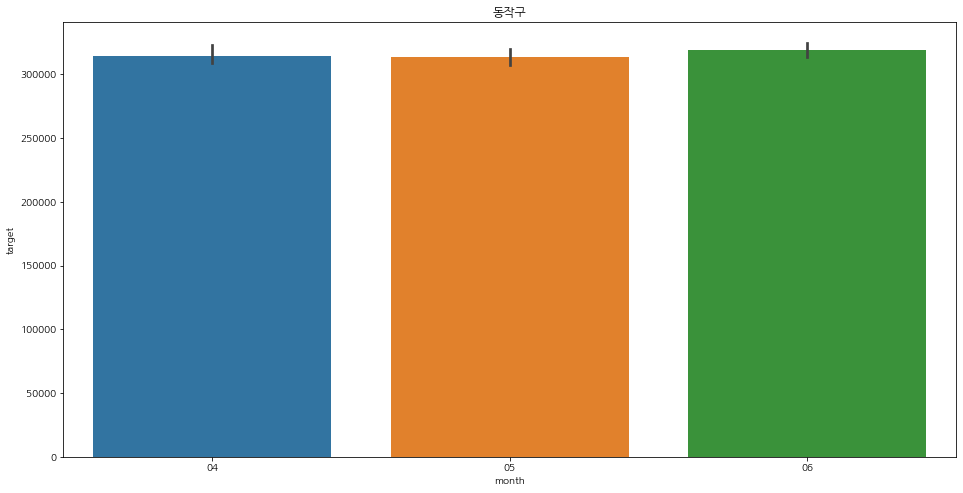

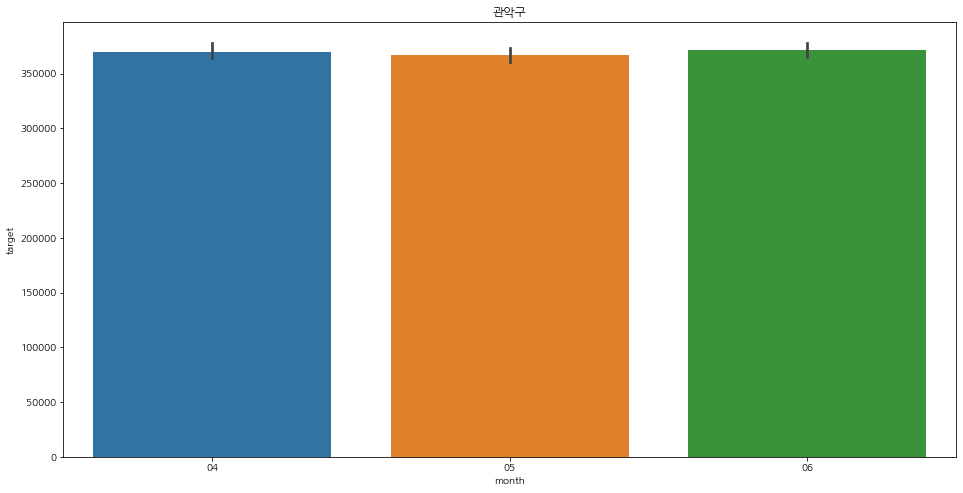

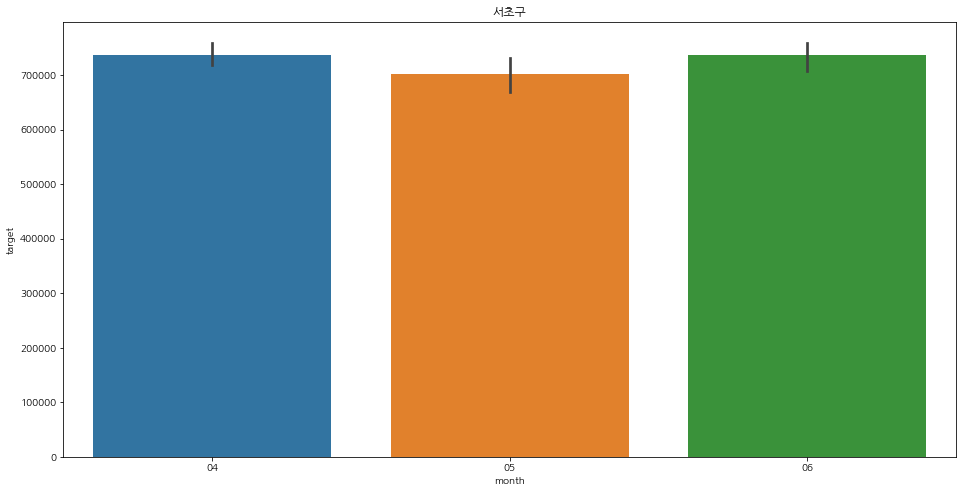

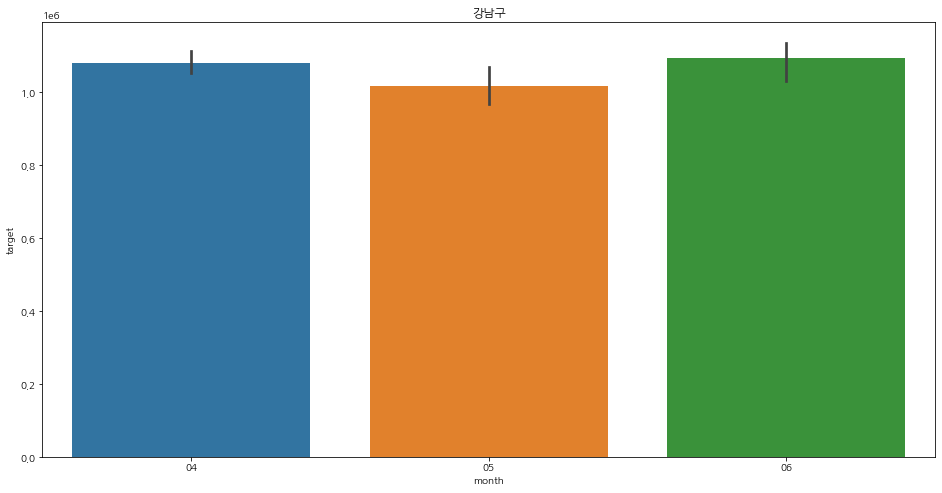

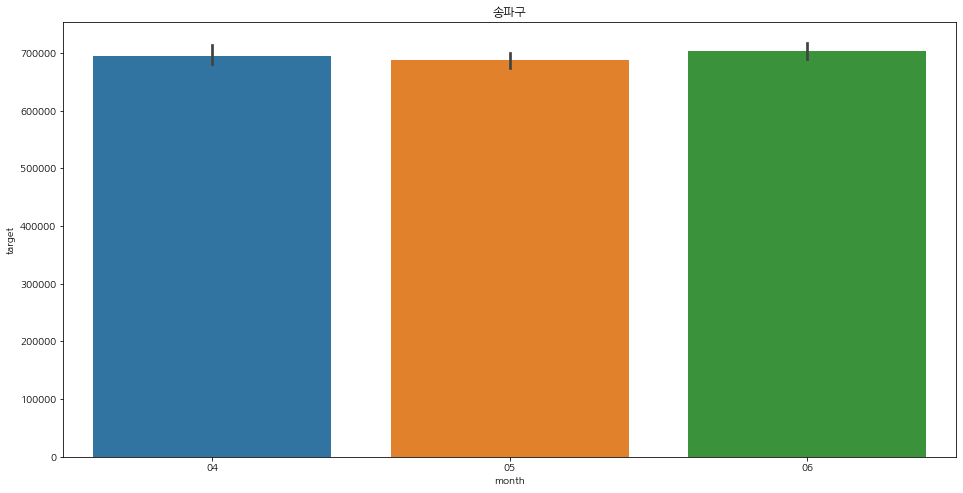

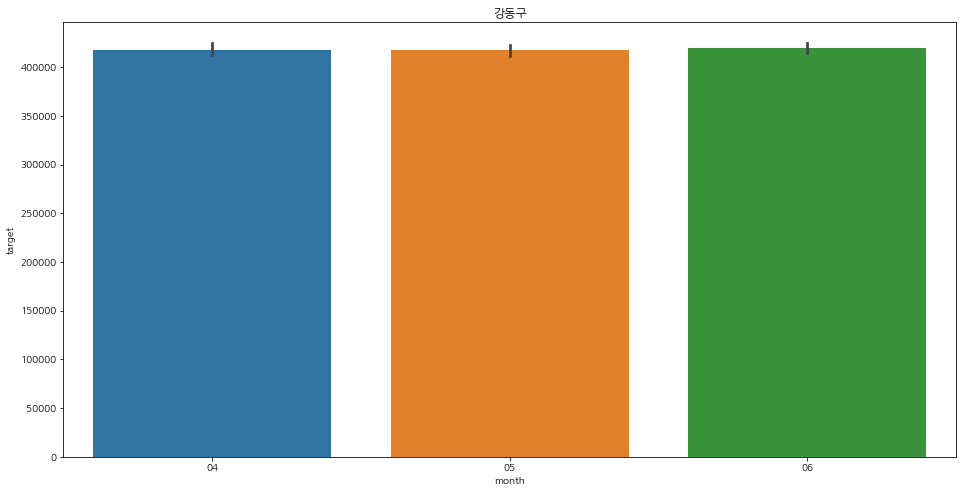

In [6]:
# 월 별로 구별 데이터 확인해 보기
column = train['구'].unique()
for i in column:
  plt.figure(figsize = (16,8))
  sns.barplot(data = train[train['구'] == i], x = 'month', y = 'target')
  plt.title(f'{i}')
  plt.show()

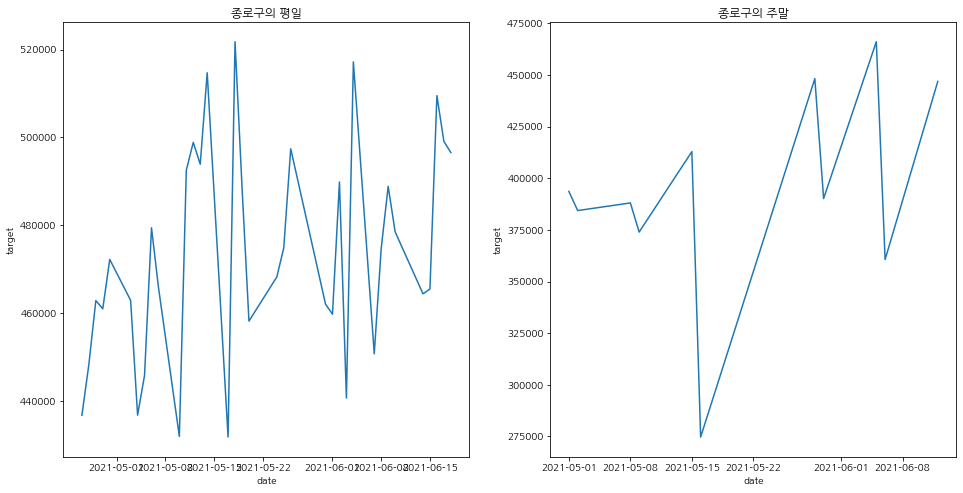

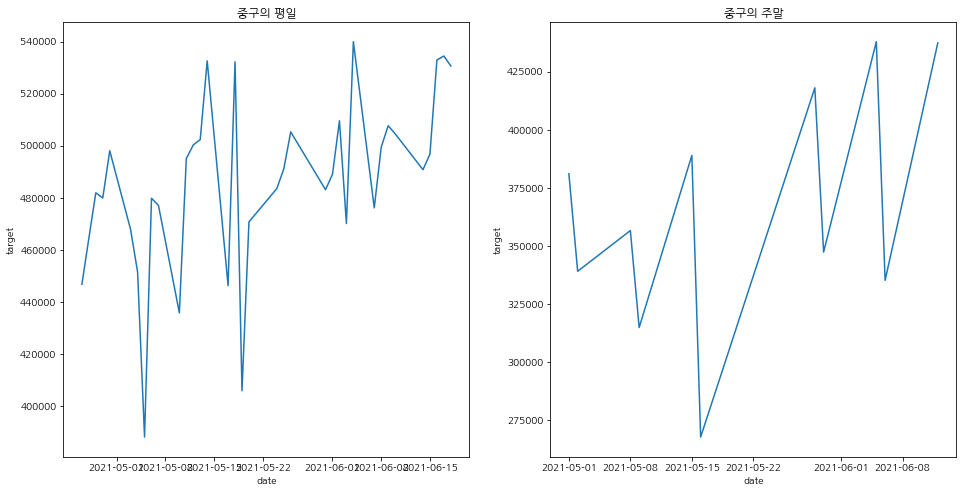

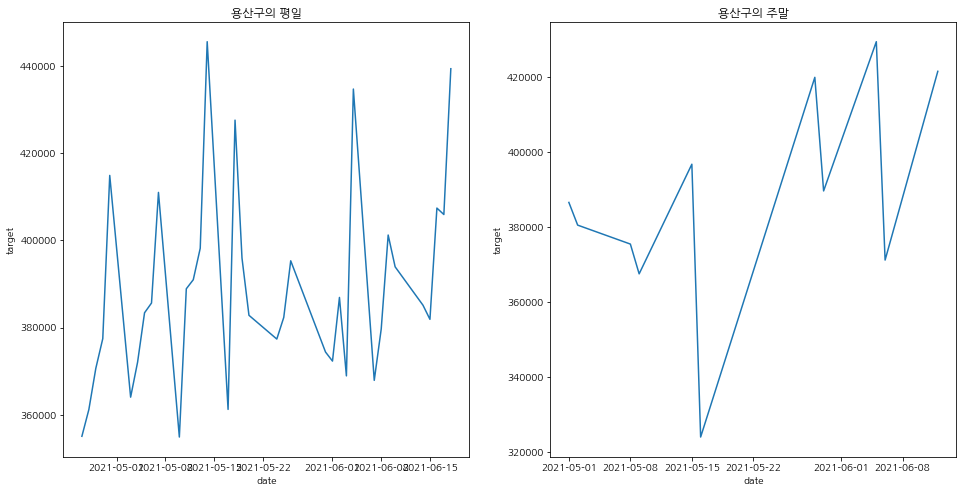

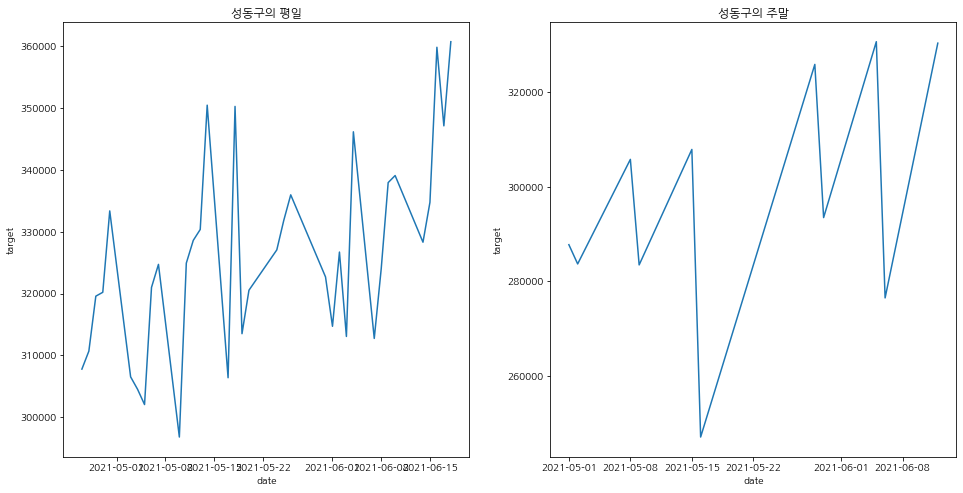

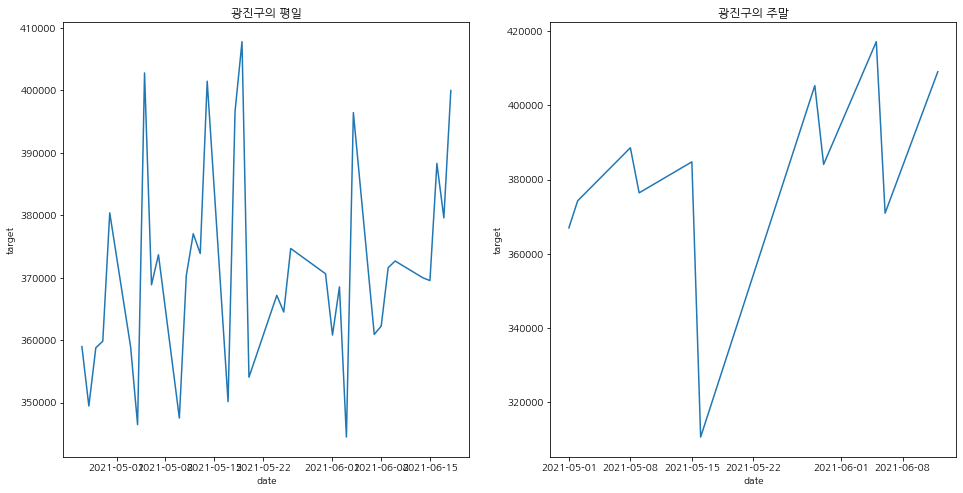

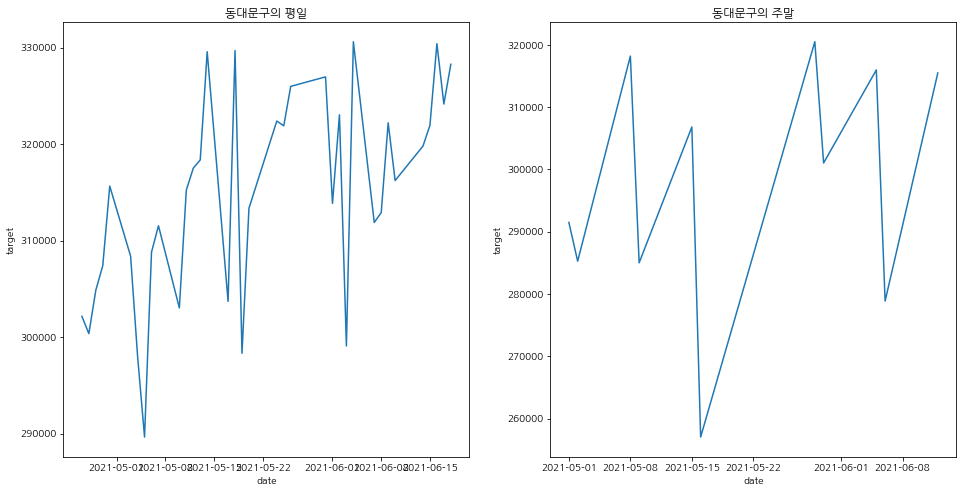

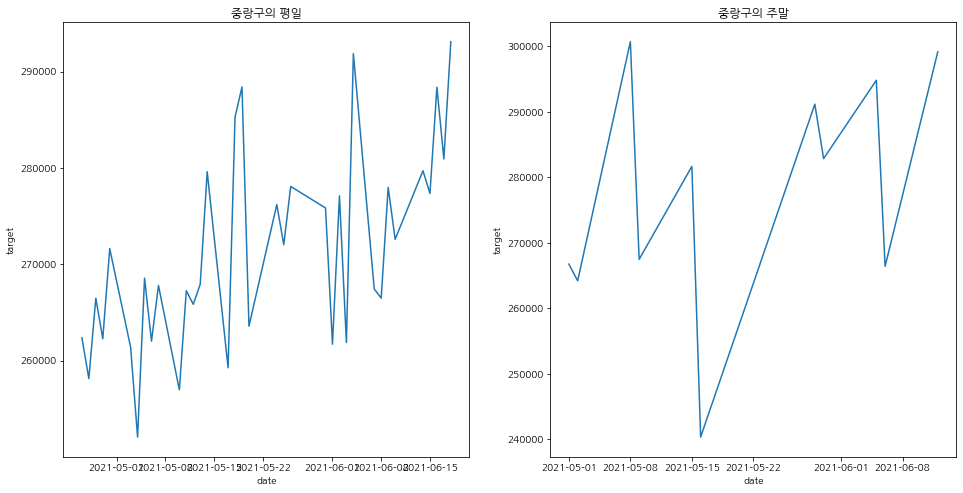

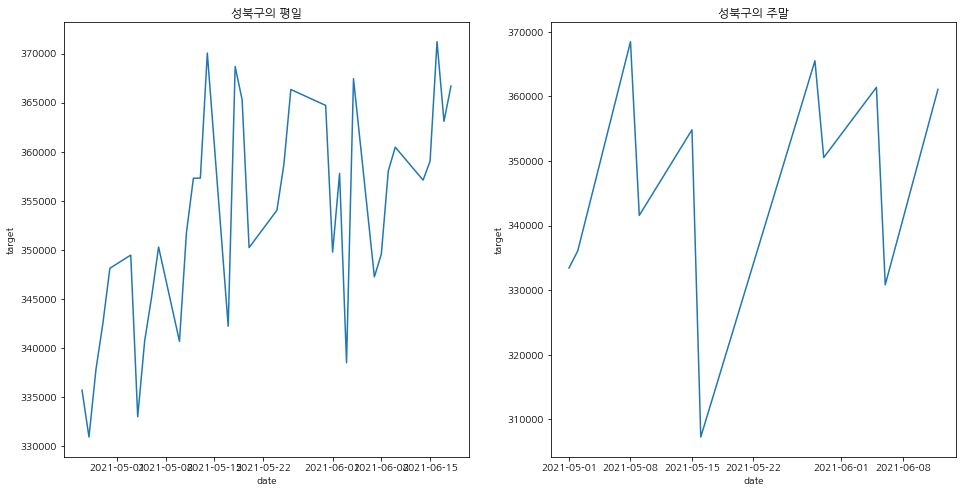

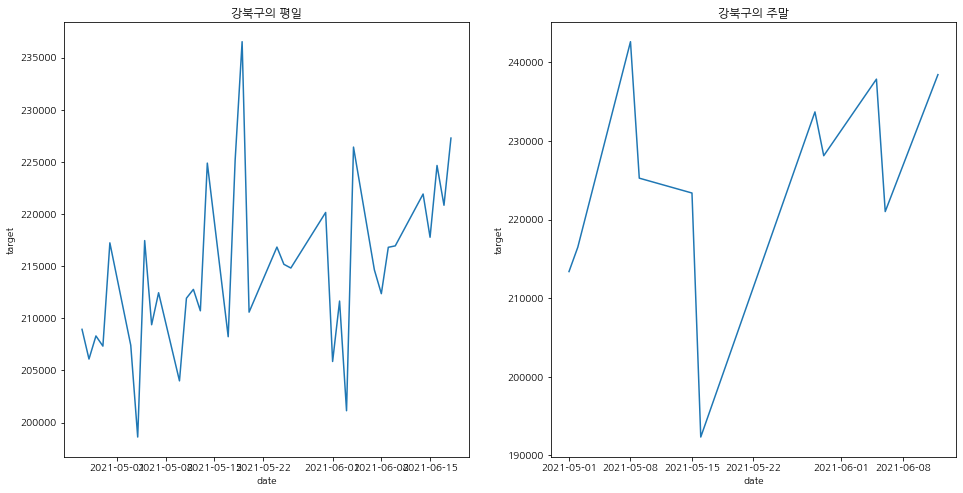

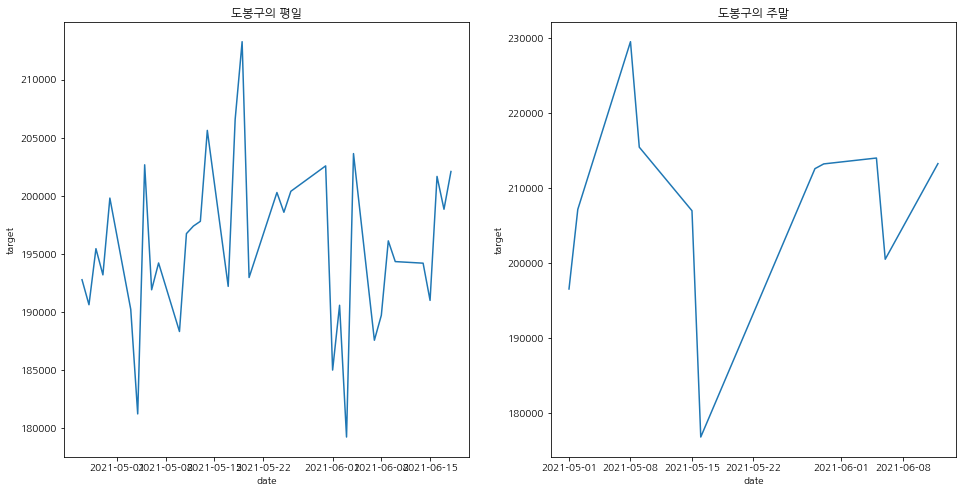

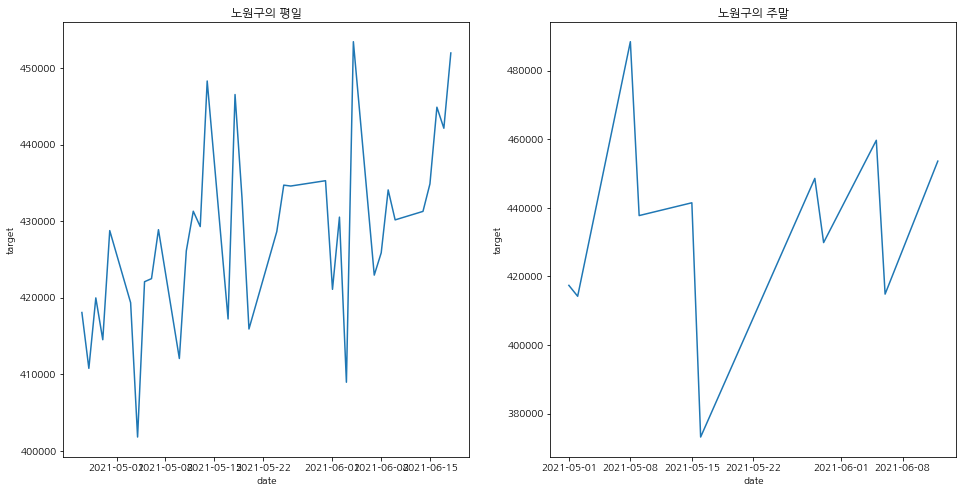

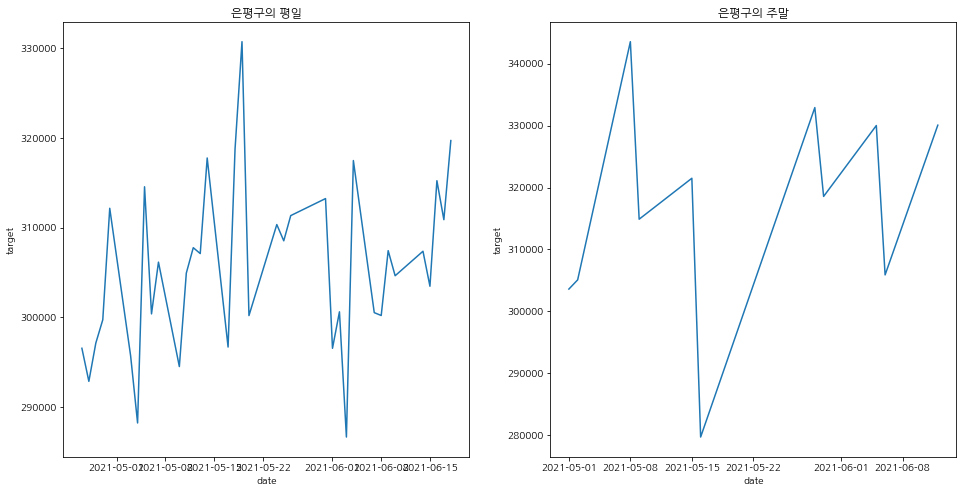

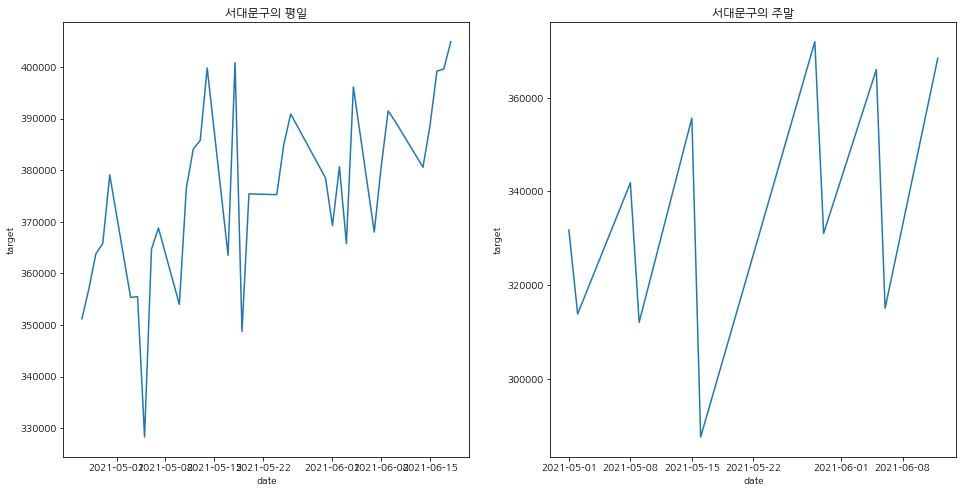

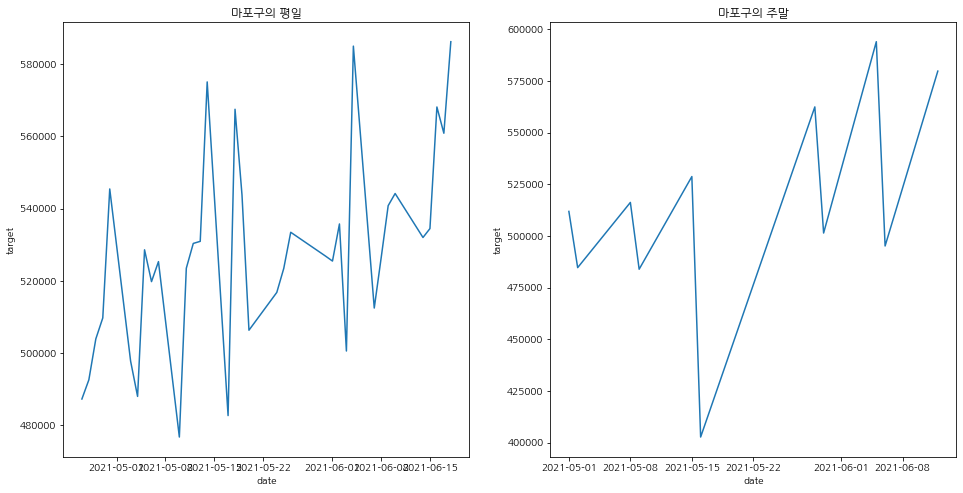

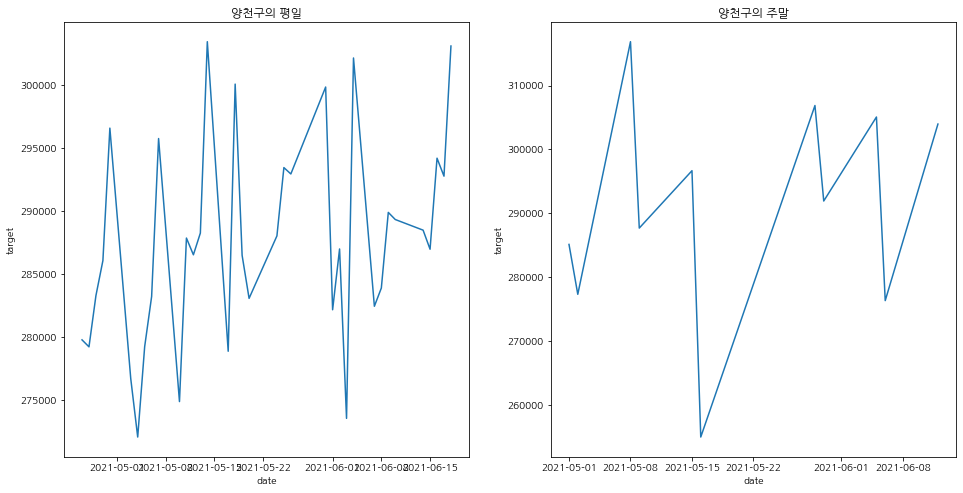

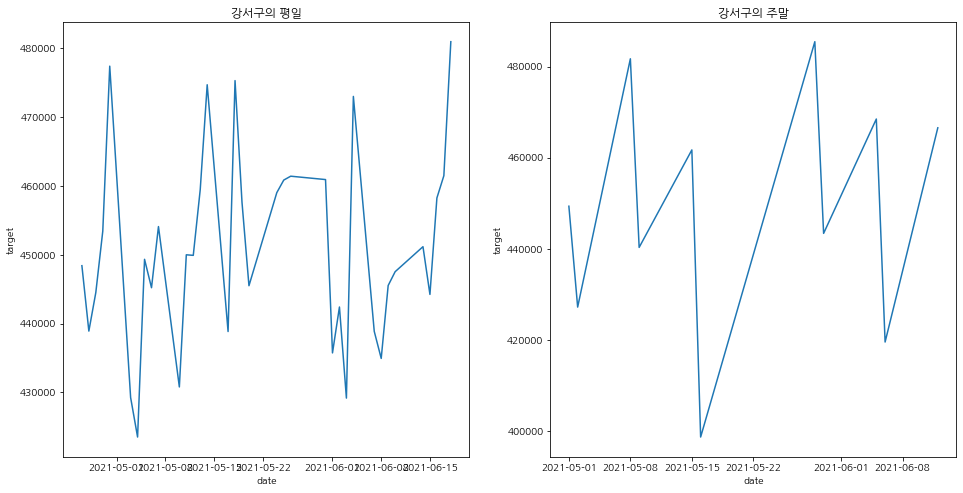

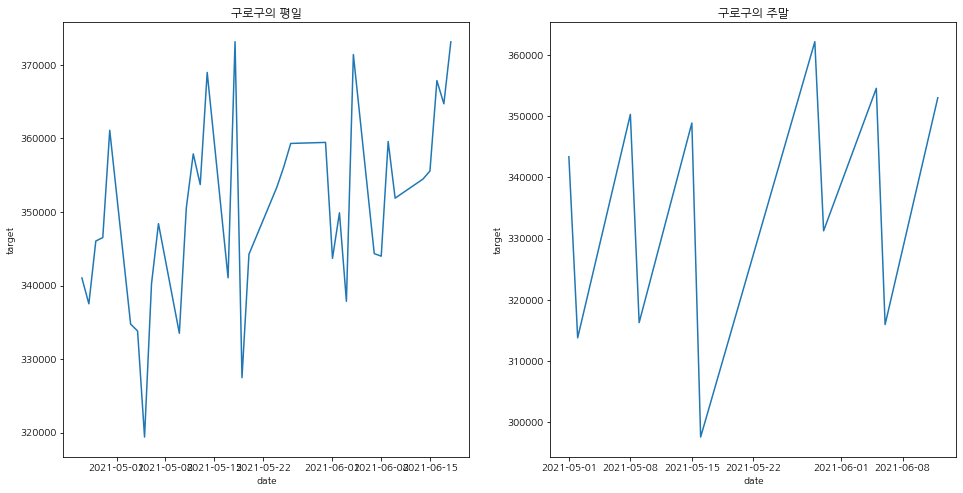

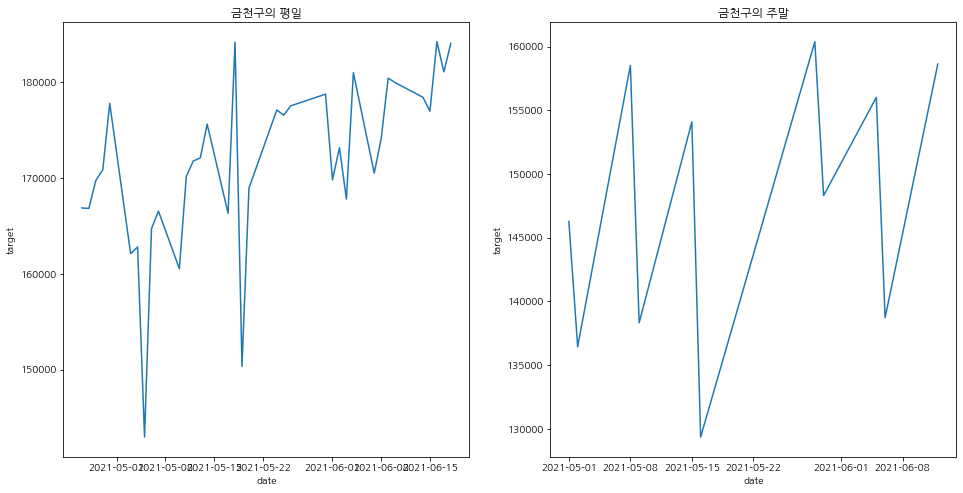

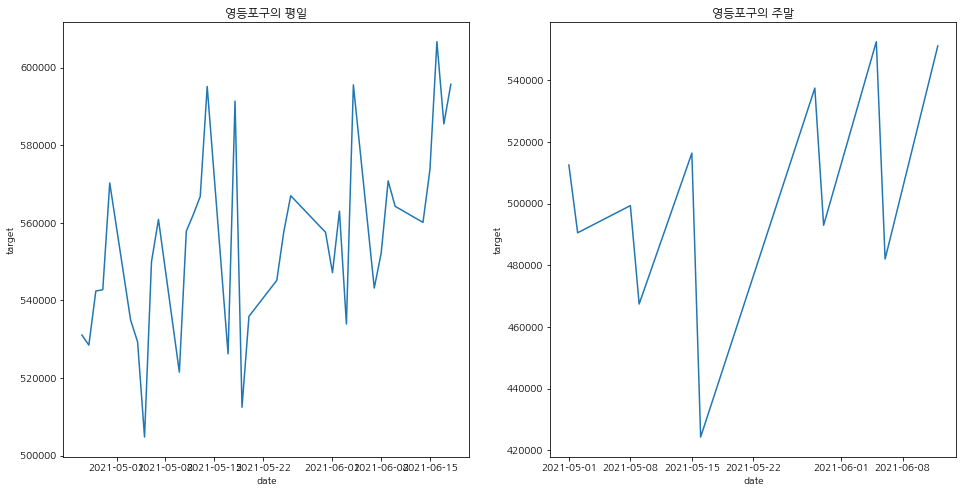

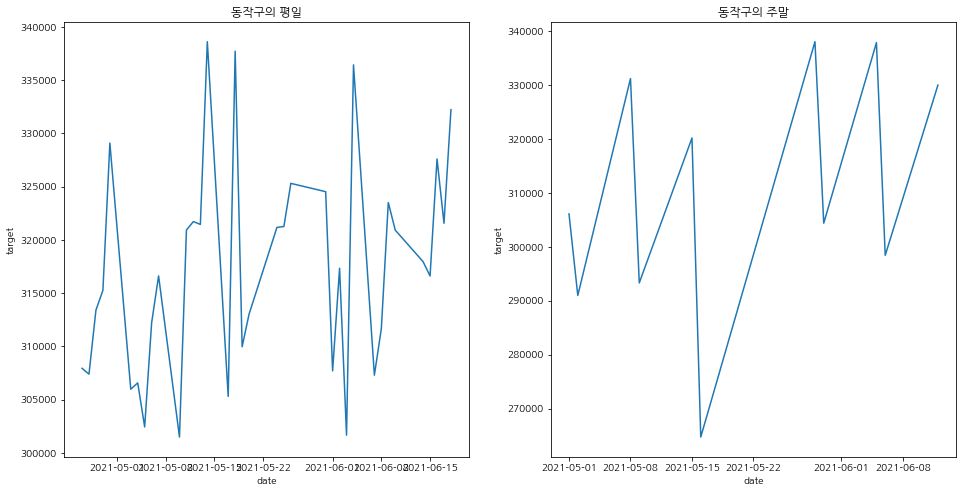

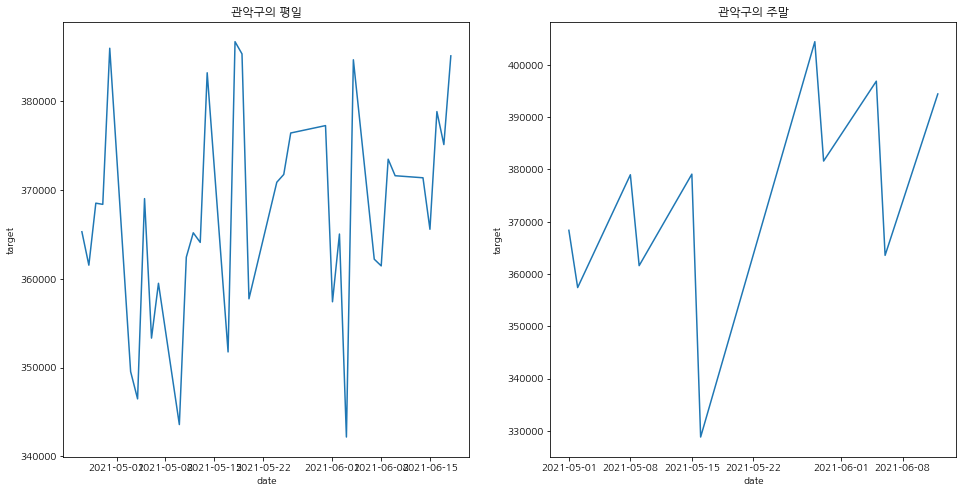

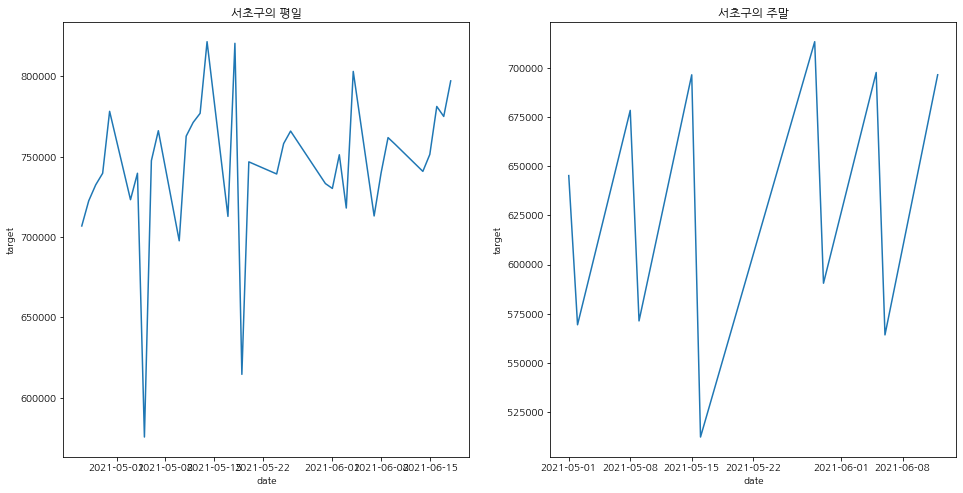

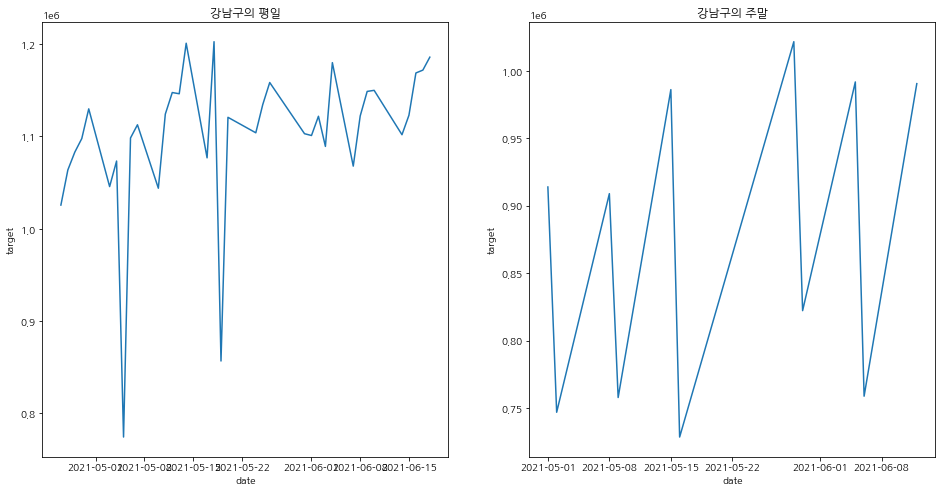

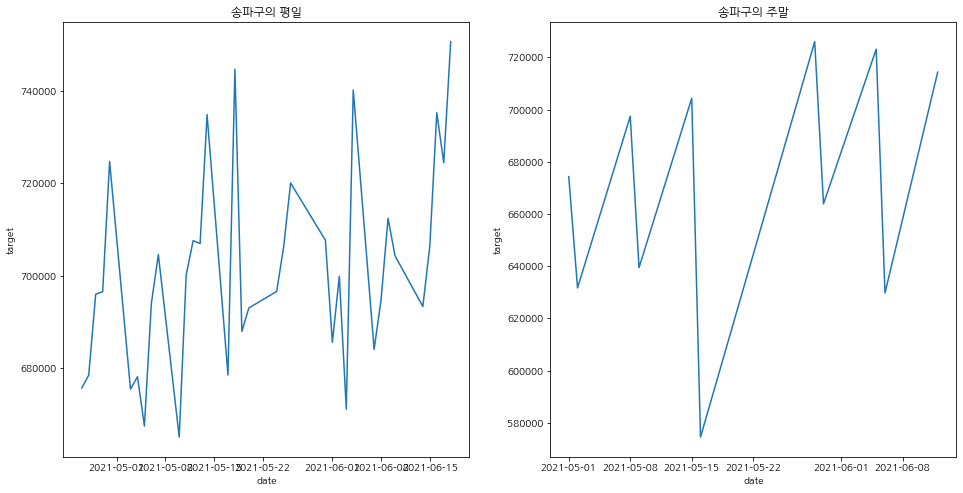

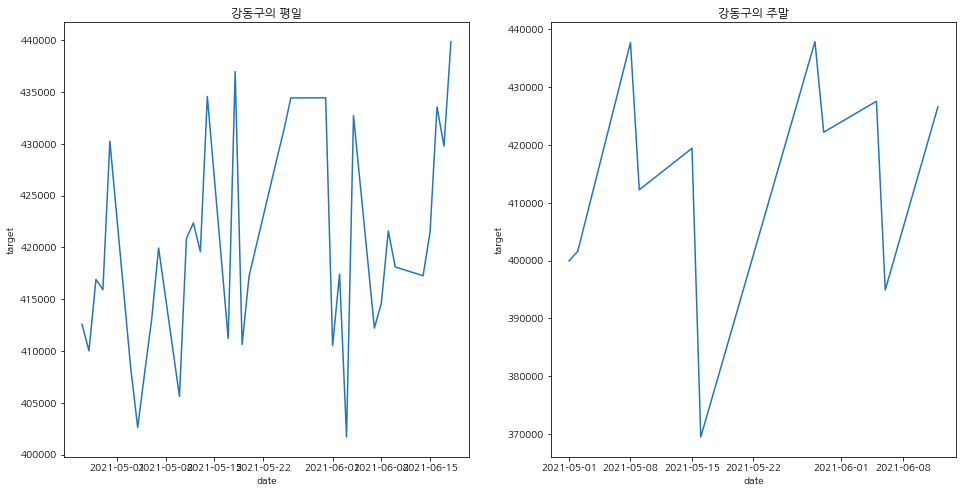

In [7]:
# 구별로 lineplot을 그려보자.
# 구별로 평일과 주말을 한 그래프에 그려주게 된다면 겹치는 부분이 많아서 비교하기 어렵다고 판단하여 각 구별 평일 주말로 그려주게 되었다.
for i in column:
  fig, ax  = plt.subplots(ncols = 2, figsize = (16,8))
  sns.lineplot(data = train[(train['구'] == i) & (train['weekday'] == 0)], x ='date', y = 'target', ax = ax[0])
  sns.lineplot(data = train[(train['구'] == i) & (train['weekday'] == 1)], x = 'date', y = 'target', ax = ax[1])
  ax[0].set_title(f'{i}의 평일')
  ax[1].set_title(f'{i}의 주말')
  plt.show()

-  5월 15 - 22일의 데이터와 6월 1 - 8일까지의 데이터에서 갑자기 내려가는 구간을 포착했다.

- 평일의 경우는 비슷한 분포를 가지고 있는 것 같다.

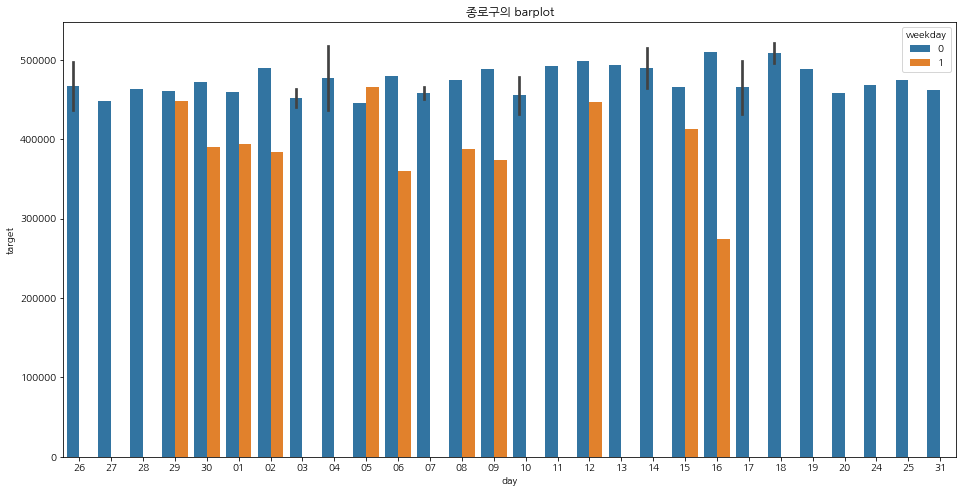

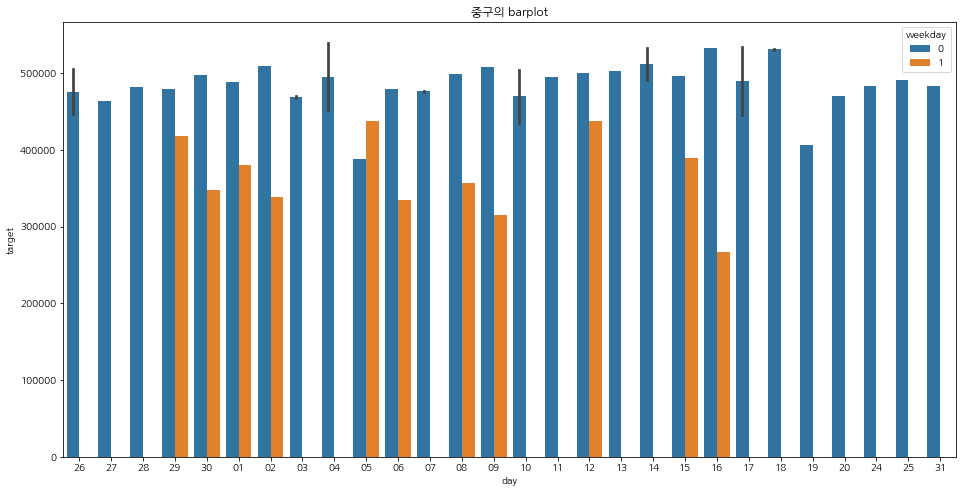

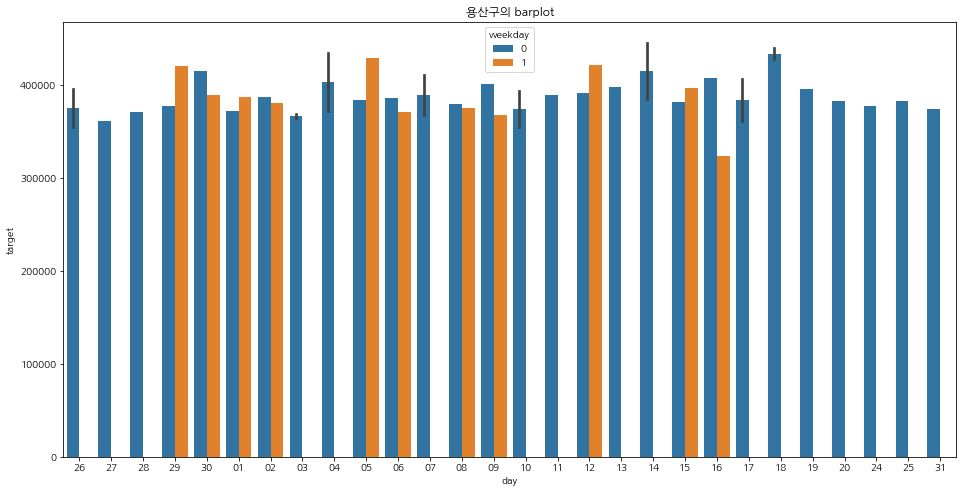

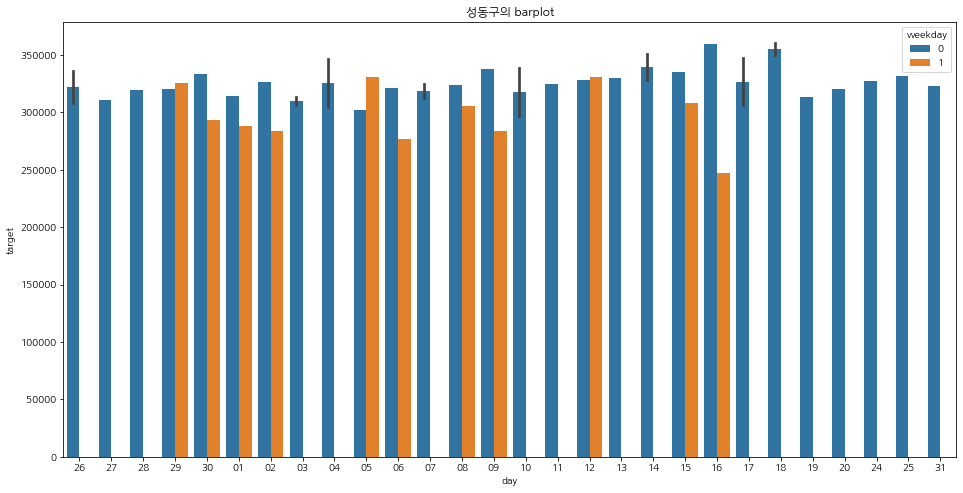

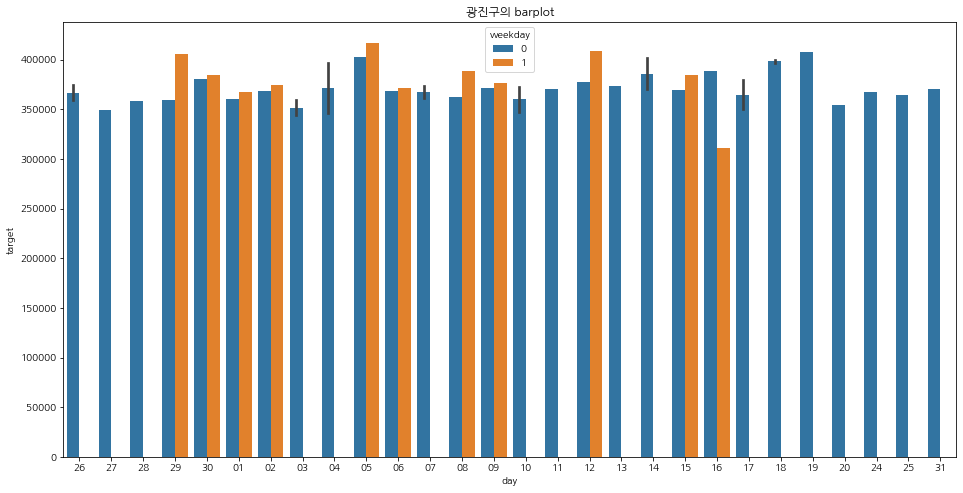

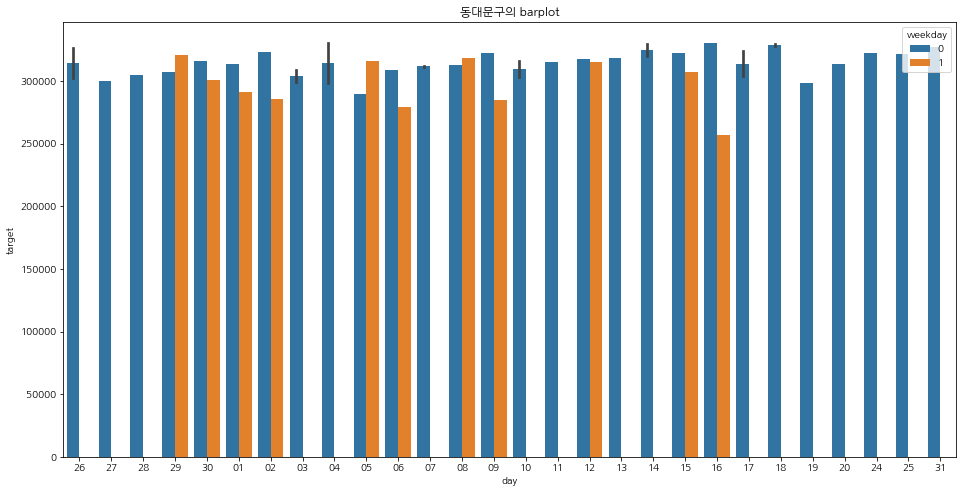

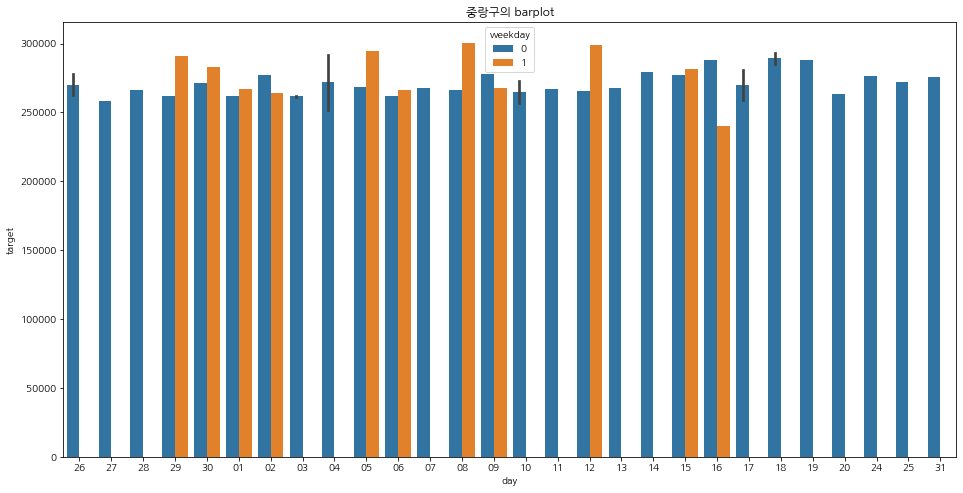

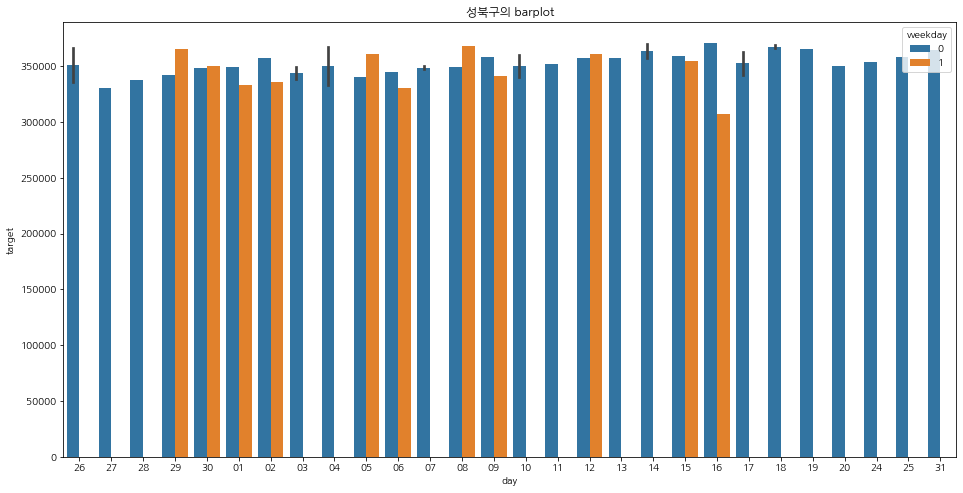

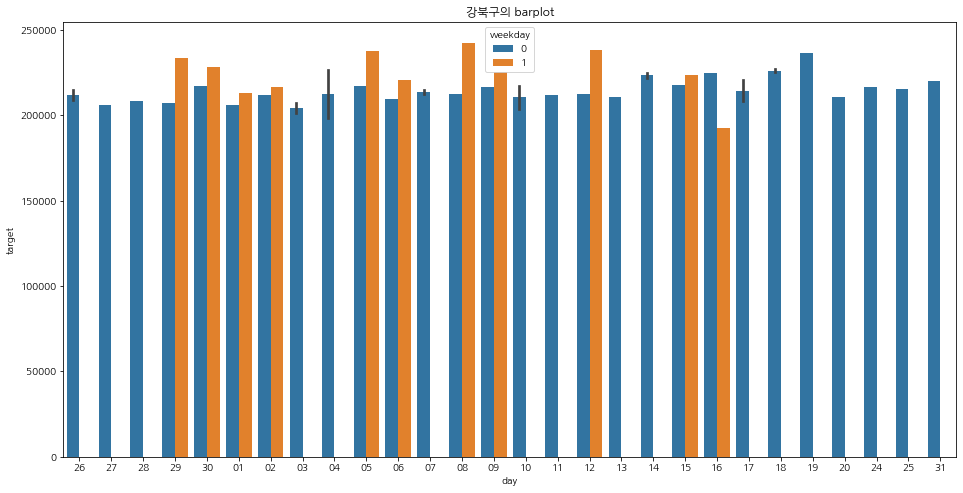

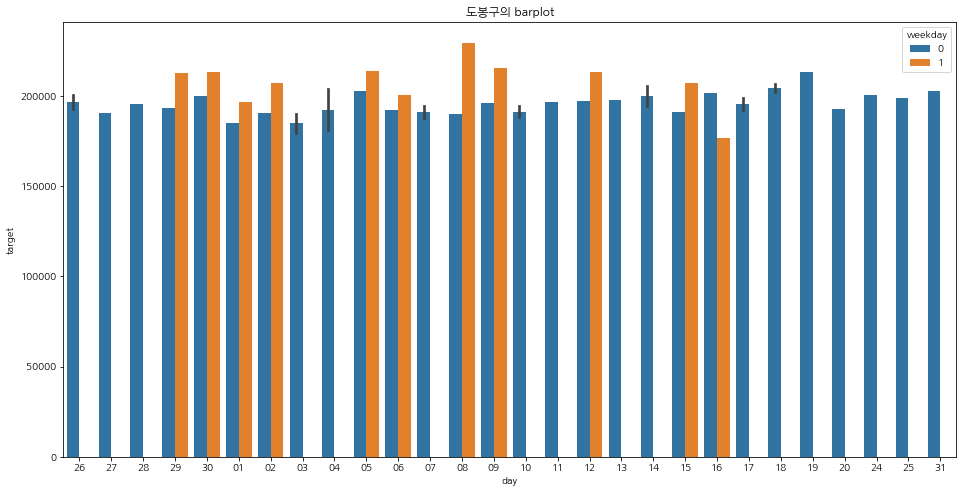

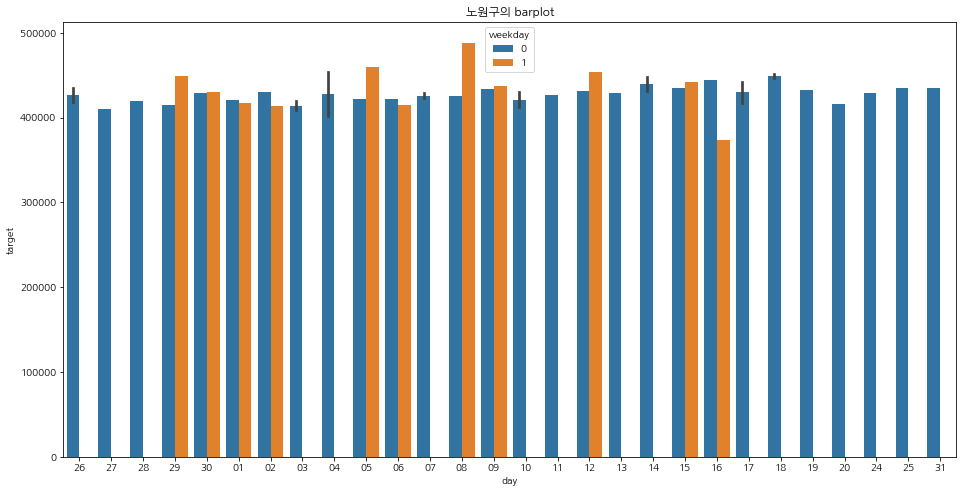

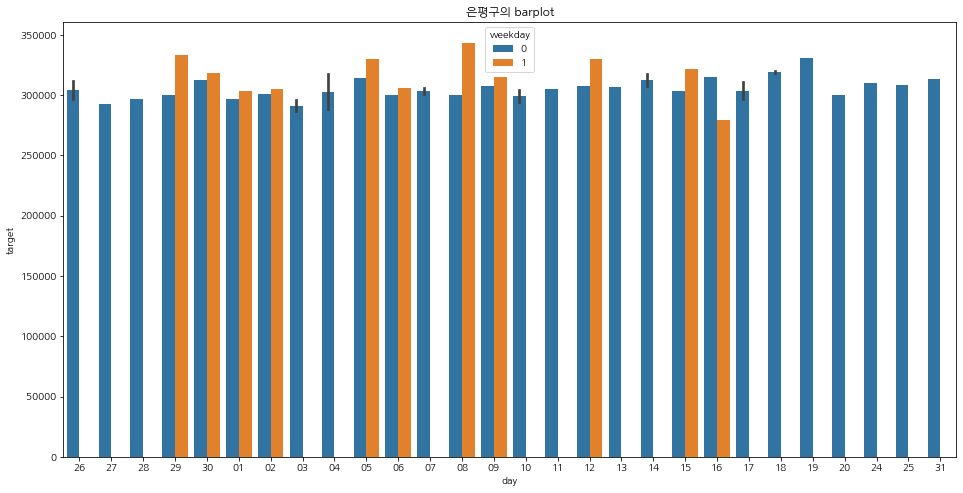

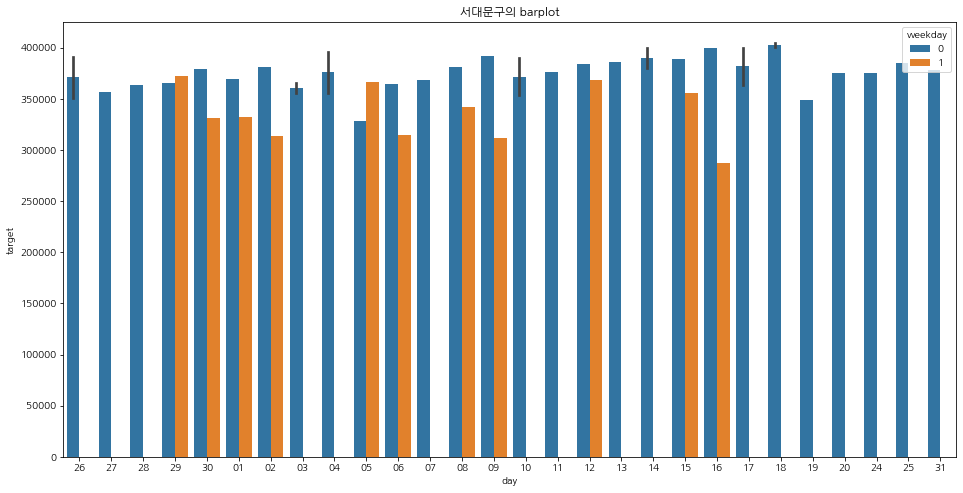

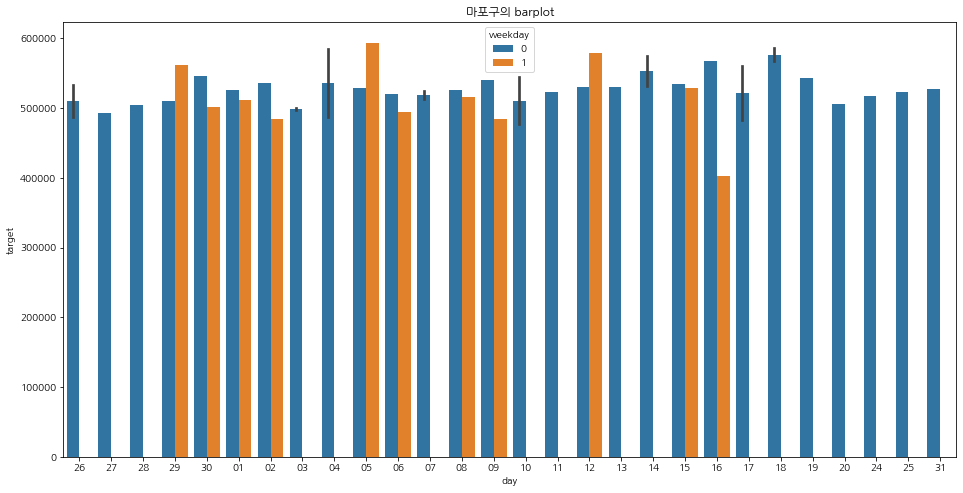

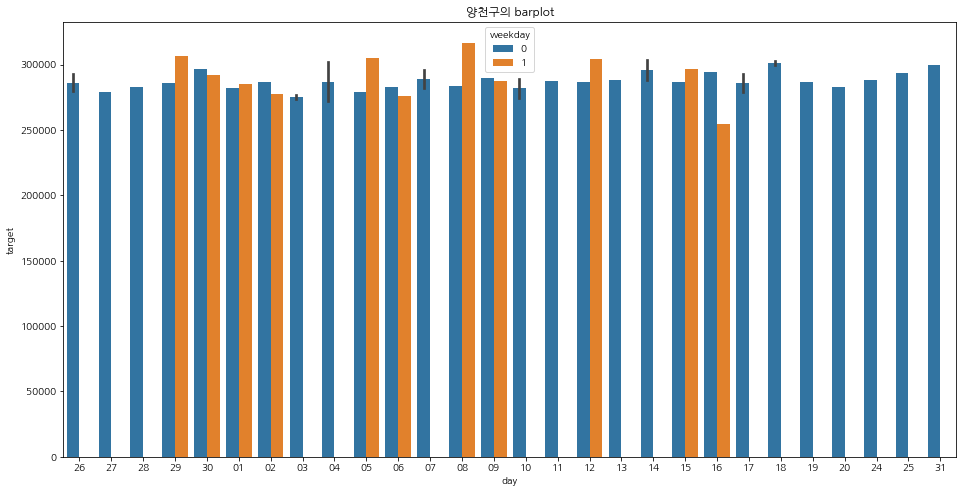

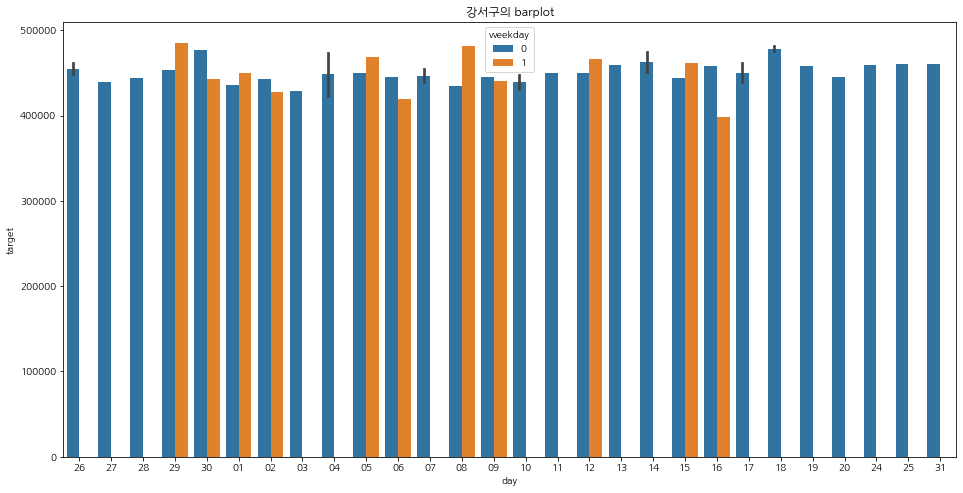

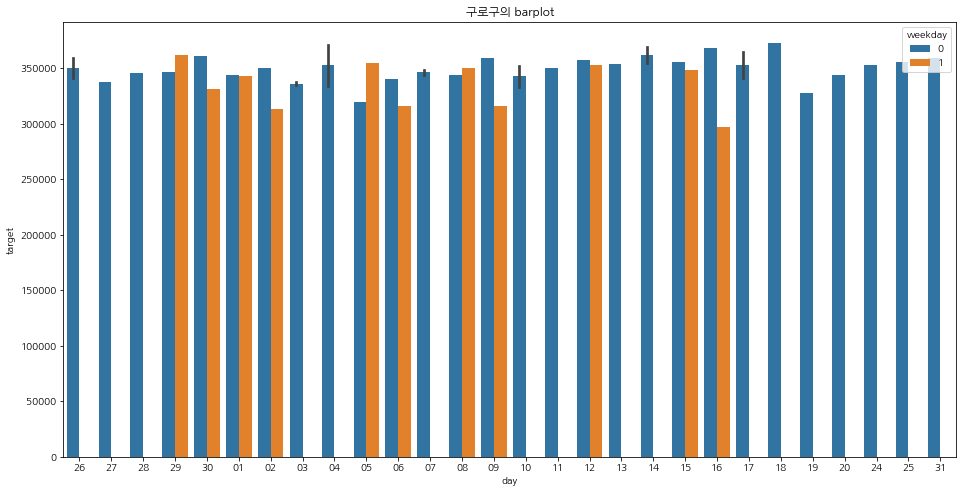

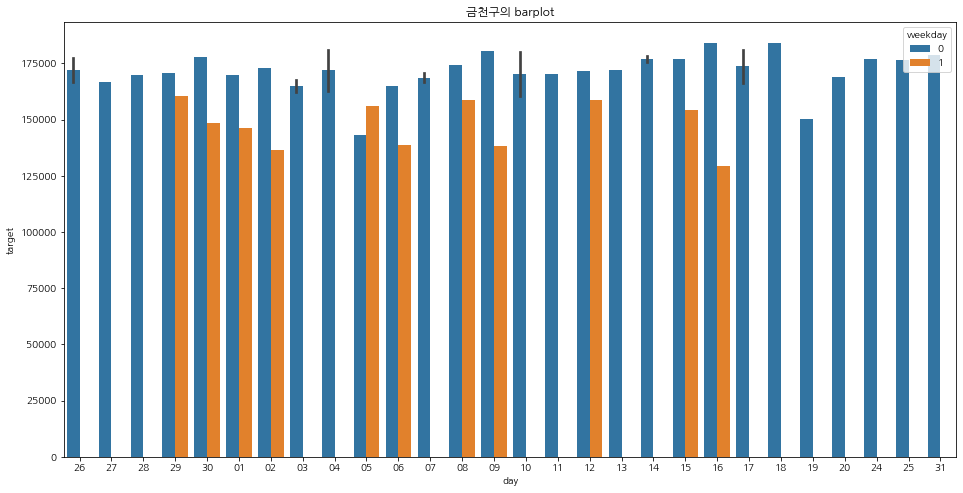

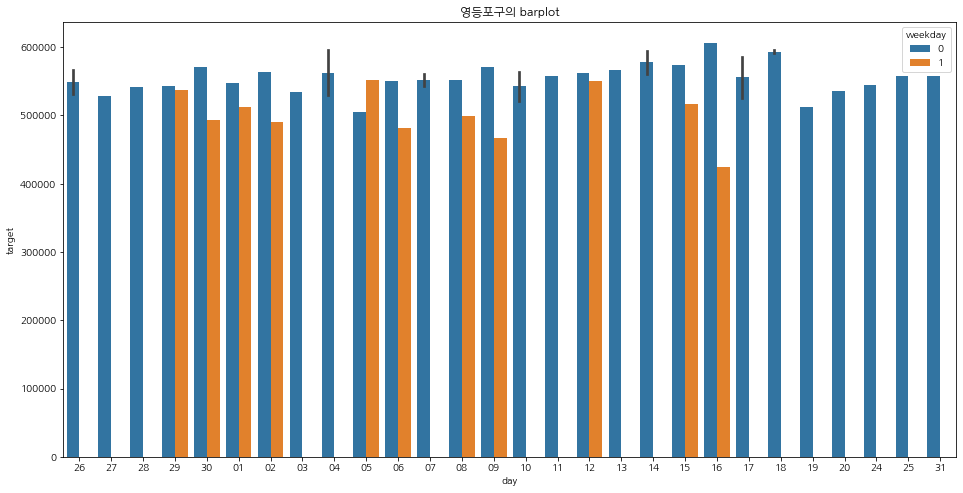

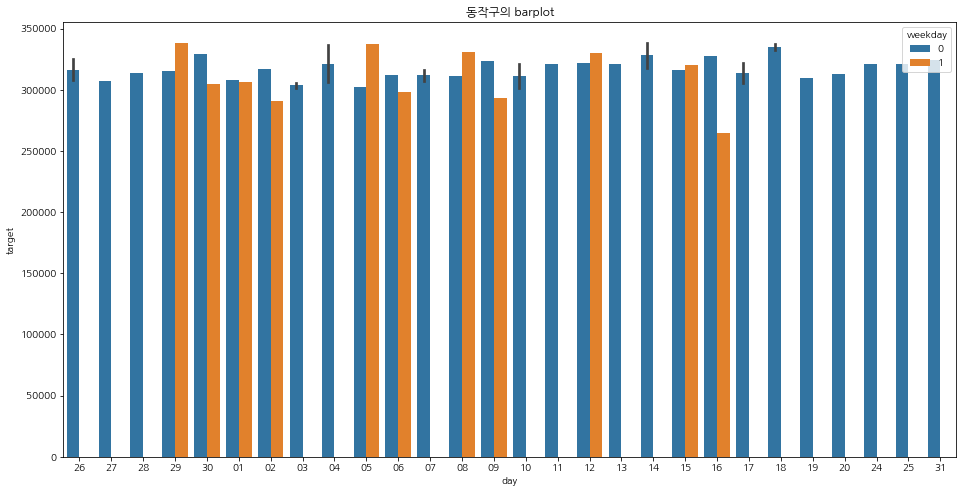

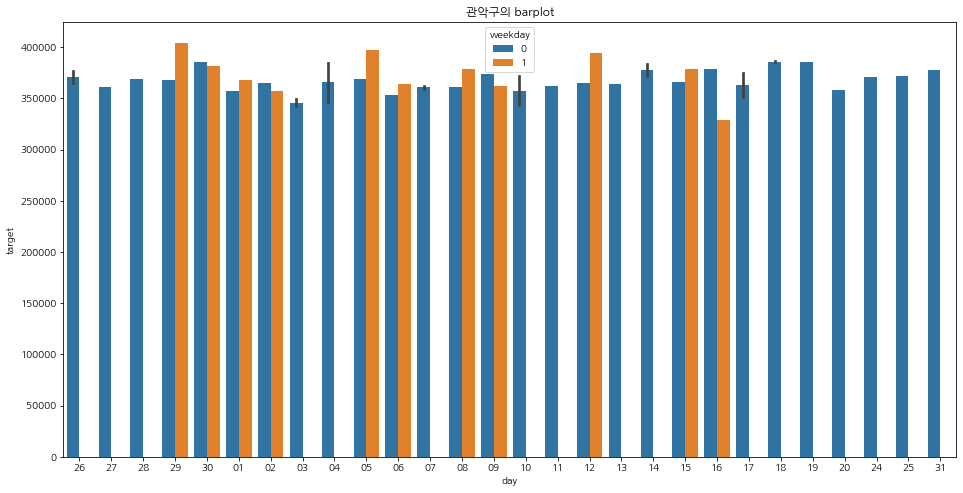

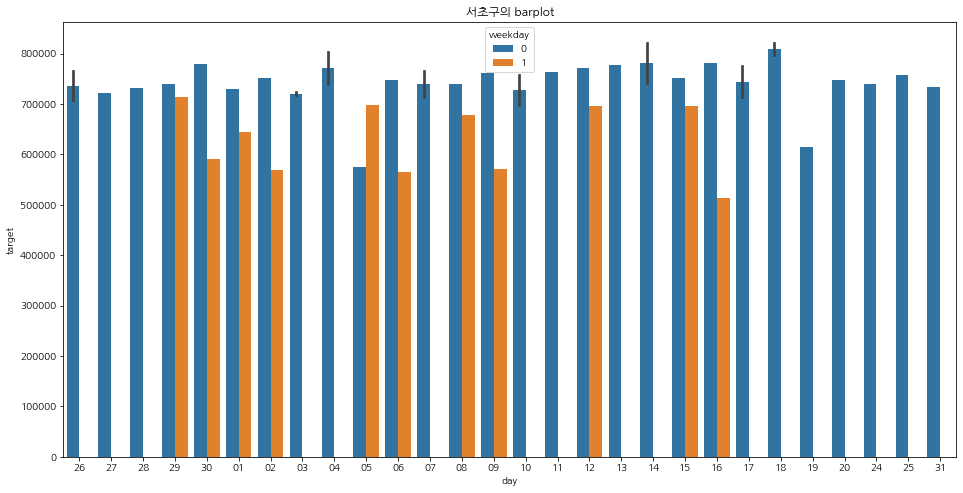

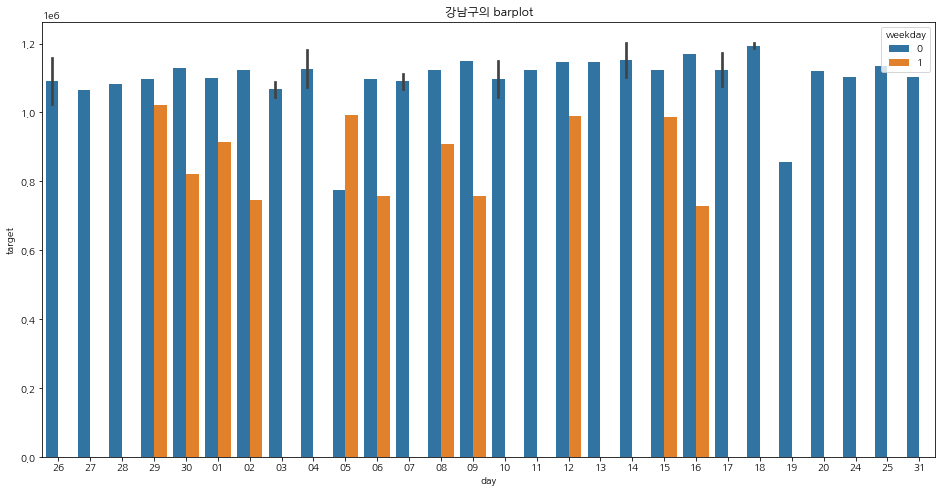

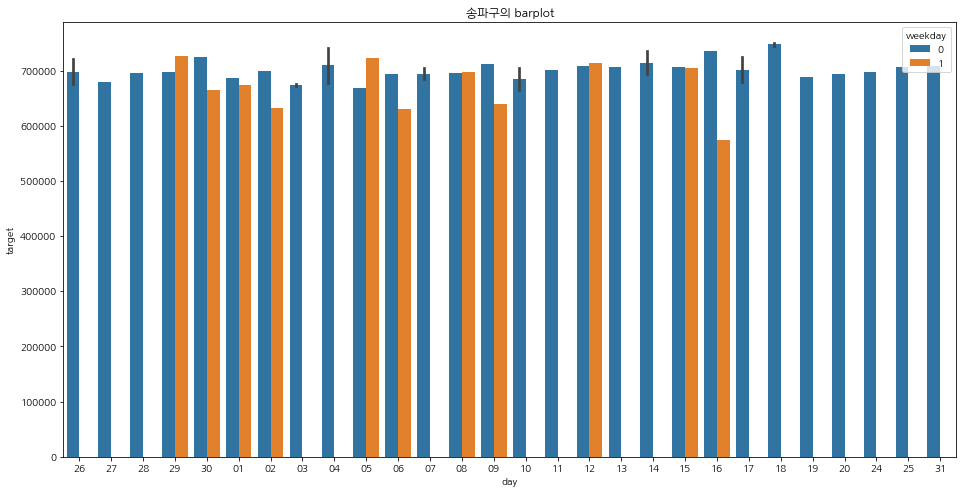

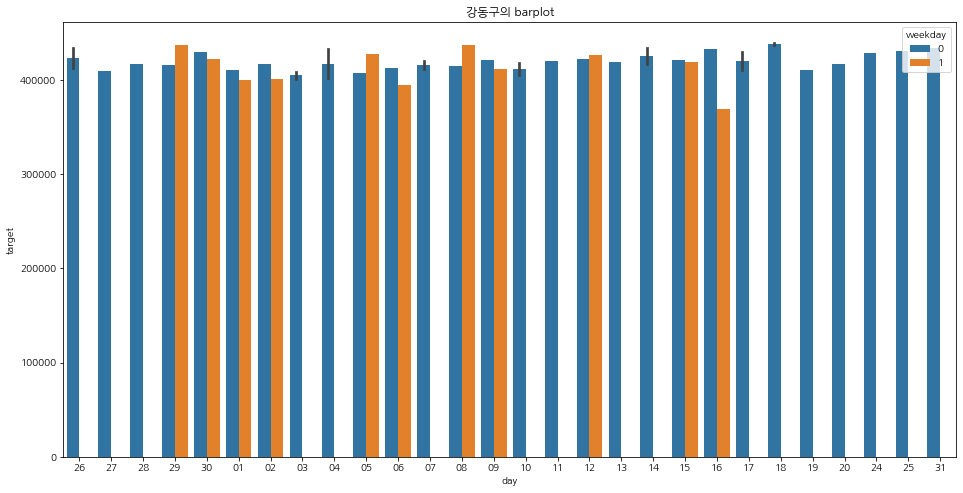

In [8]:
# 일별로 데이터를 살펴보자.
for i in column:
  plt.figure(figsize = (16,8))
  sns.barplot(data = train[train['구'] == i], x = 'day', y  = 'target', hue = 'weekday')
  plt.title(f'{i}의 barplot')
  plt.show()

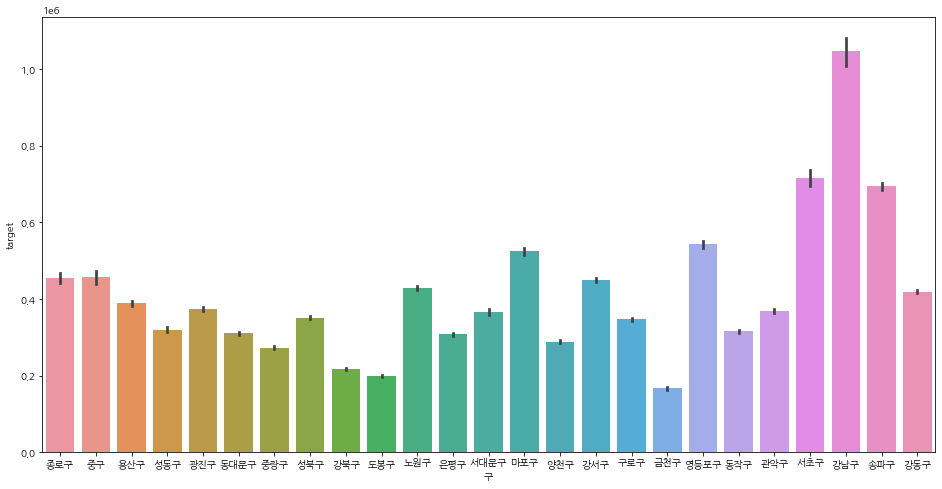

In [10]:
# 구별로 얼마나 차이가 있는지 확인해 보자.
plt.figure(figsize  = (16,8))
sns.barplot(data = train, x = '구', y = 'target')

# 데이터를 보게 되면 강남구로 놀러가는 사람이 제일 많고 두 번째는 서초구가 많은 것으로 나타난다.
# 그러면 강남구에 평일? 주말? 언제 많이 오는지 찾아보도록 하자.

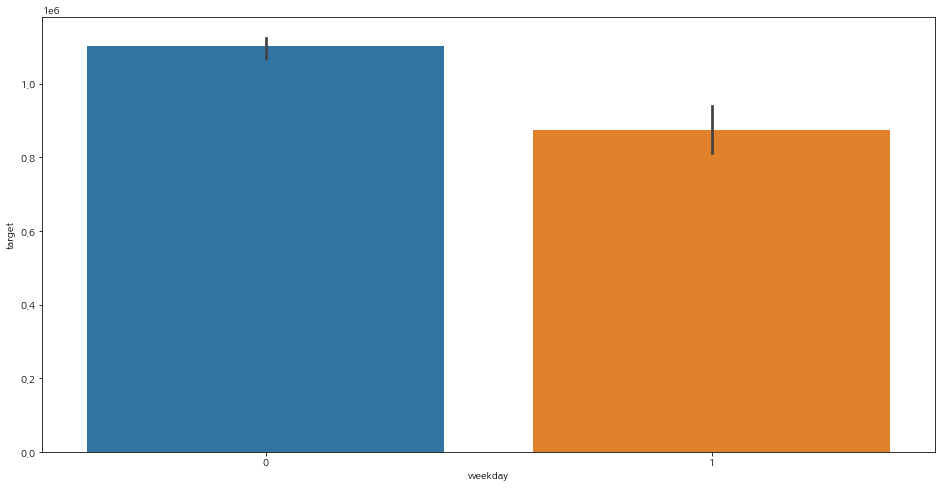

In [12]:
# 강남구는 평일에 많은 사람들이 여행을 오는 것을 알 수 있다.
plt.figure(figsize = (16,8))
sns.barplot(data =train[train['구'] == '강남구'], x = 'weekday', y = 'target')

# 날씨 데이터

In [23]:
weather = pd.read_csv('/content/drive/MyDrive/Proj_WT/DataSets/기상청_관광코스별_관광지_상세날씨/시군구별관광기후지수_2021.csv')

weather = weather[weather['시도'] == '서울']
weather.head(5)

,예보시각,전체 도시 이름,시도,시군구,시군구코드,관광기후지수,관광기후지수등급
0,2021-06-20 00:00,서울 강남구,서울,강남구,1168000000,0.37,매우좋음
1,2021-06-19 00:00,서울 강남구,서울,강남구,1168000000,0.48,매우좋음
2,2021-06-18 00:00,서울 강남구,서울,강남구,1168000000,-0.16,보통
3,2021-06-17 00:00,서울 강남구,서울,강남구,1168000000,0.10,보통
4,2021-06-16 00:00,서울 강남구,서울,강남구,1168000000,0.29,좋음


In [30]:
# 4월 26일 ~ 6월 18일
weather = weather[(weather['예보시각'] <= '2021-06-18') & (weather['예보시각'] >= '2021-04-26')]

# 데이터를 target변수와 비교하기 위해서 데이터를 나눠준다.
weather['예보시각'] = pd.to_datetime(weather['예보시각'])
weather['month'] = weather['예보시각'].dt.month
weather['date'] = weather['예보시각'].dt.date
weather['day'] = weather['예보시각'].dt.day
weather['weekend'] = weather['예보시각'].apply(lambda x:x.weekday())
weather['weekday'] = weather['weekend'].apply(lambda x:1 if x > 4 else 0)